In [13]:
import mdtraj as md
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Analyze 14/157 rest cache traj and load reference structure

In [94]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/157/scatter/157/"
i = 157
phase = 'complex'
endstate = 1
# name = 'tyr'
# is_old = False

# with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
#     htf = pickle.load(f)
    
# make_traj(outdir, htf, i, phase, name, endstate, is_old)


In [95]:
traj = md.load(os.path.join(outdir, f"{i}_{phase}_{endstate}.dcd"), top=md.Topology.from_openmm(htf._topology_proposal.new_topology))

In [96]:
# Load reference SA structure
pdb = md.load("SA_rbd_ace2_N501Y_protonated.pdb")


## Align and compute rmsd for all rbd:ace2 indices

In [97]:
count = 0
c_term = list(range(802, 915))
# c_term_glycan = list(range(777, 785))
caps = [0, 195]
rbd_ace2_chains = [0, 2]
residues = []
WT_indices = []
for atom in traj.topology.atoms:
    if atom.residue.chain.index in rbd_ace2_chains:
        if atom.residue.index not in c_term + caps:
            WT_indices.append(atom.index)
            count += 1
            residues.append(atom.residue.index) 
print(count)
print(len(set(residues)))

# The RBD structure has:
# Extra C-term ACE2 residues: (802-914)
# Extra C-term ACE2 glycan (777-784)
# Missing RBD N- and C- term residues (therefore remove the caps) (0, 195)
        

12488
790


In [98]:
SA_indices = pdb.topology.select("(chainid == 0 or chainid == 4) and resi != 0 and resi != 1 and resi != 2 and resi != 197 and resi != 198 and resi != 199 and resi != 200 and resi != 880")


In [99]:
traj = traj.superpose(pdb, atom_indices=WT_indices, ref_atom_indices=SA_indices)


In [100]:
rmsds = md.rmsd(traj, pdb, atom_indices=WT_indices, ref_atom_indices=SA_indices)



In [101]:
np.mean(rmsds[50:])

0.34023586

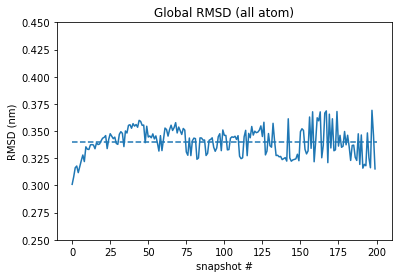

In [103]:
plt.plot(rmsds)
plt.xlabel("snapshot #")
plt.ylabel("RMSD (nm)")
plt.ylim([0.25, 0.45])
plt.hlines(np.mean(rmsds[50:]), 0, len(rmsds), linestyles='dashed')
plt.title('Global RMSD (all atom)')
plt.show()

## Align and compute rmsd for N501Y region

In [104]:
SA_sliced = pdb.atom_slice(SA_indices)


In [105]:
for res in SA_sliced.topology.residues:
    if res.resSeq == 501 and res.chain.index == 0:
        mutated_res = res
query_indices = [atom.index for atom in mutated_res.atoms]
solute_atoms = list(SA_sliced.topology.select("is_protein"))
neighboring_atoms = list(md.compute_neighbors(SA_sliced, 0.5, query_indices, haystack_indices=solute_atoms)[0])
neighboring_residues_SA = set([atom.residue.index for atom in SA_sliced.topology.atoms if atom.index in neighboring_atoms])
neighboring_residue_info = set([(atom.residue.chain.index, atom.residue.resSeq, atom.residue.name) for atom in SA_sliced.topology.atoms if atom.index in neighboring_atoms])
neighboring_atoms_SA = [atom.index for atom in SA_sliced.topology.atoms if atom.residue.index in neighboring_residues_SA]

In [106]:
WT_sliced = traj.atom_slice(WT_indices)


In [107]:
neighboring_residues_WT = []
for residue in WT_sliced.topology.residues:
    for info in neighboring_residue_info:
        if info[0] == residue.chain.index and info[1] == residue.resSeq and info[2] == residue.name:
            print(residue)
            neighboring_residues_WT.append(residue.index)


ASN439
SER443
TYR495
GLY496
PHE497
GLN498
PRO499
THR500
TYR501
GLY502
VAL503
TYR505
GLN506
PRO507
GLU37
ASP38
TYR41
GLY352
LYS353
GLY354
ASP355


In [108]:
neighboring_atoms_WT = [atom.index for atom in WT_sliced.topology.atoms if atom.residue.index in neighboring_residues_WT]

In [109]:
WT_sliced = WT_sliced.superpose(SA_sliced, atom_indices=neighboring_atoms_WT, ref_atom_indices=neighboring_atoms_SA)


In [110]:
rmsds = md.rmsd(WT_sliced, SA_sliced, atom_indices=neighboring_atoms_WT, ref_atom_indices=neighboring_atoms_SA)



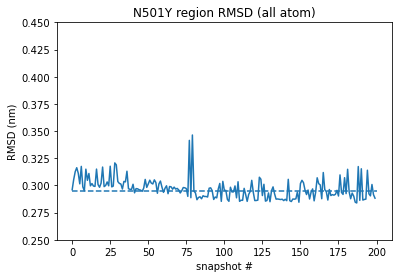

In [112]:
plt.plot(rmsds)
plt.xlabel("snapshot #")
plt.ylabel("RMSD (nm)")
plt.ylim([0.25, 0.45])
plt.hlines(np.mean(rmsds[50:]), 0, len(rmsds), linestyles='dashed')
plt.title('N501Y region RMSD (all atom)')
plt.show()

In [149]:
rmsds[77]

0.34146538

# Analyze 15/160 forward switching last snapshots traj and load reference structure

In [37]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/15/160/"
i = 160
phase = 'complex'
endstate = 1
# name = 'tyr'
# is_old = False

# with open(os.path.join(outdir, f"{i}_{phase}.pickle"), "rb") as f:
#     htf = pickle.load(f)
    


In [38]:
traj = md.load(os.path.join(outdir, f"{i}_{phase}_new.dcd"), top=md.Topology.from_openmm(htf._topology_proposal.new_topology))

In [39]:
# Load reference SA structure
pdb = md.load("SA_rbd_ace2_N501Y_protonated.pdb")


## Align and compute rmsd for all rbd:ace2 indices

In [40]:
count = 0
c_term = list(range(802, 915))
# c_term_glycan = list(range(777, 785))
caps = [0, 195]
rbd_ace2_chains = [0, 2]
residues = []
WT_indices = []
for atom in traj.topology.atoms:
    if atom.residue.chain.index in rbd_ace2_chains:
        if atom.residue.index not in c_term + caps:
            WT_indices.append(atom.index)
            count += 1
            residues.append(atom.residue.index) 
print(count)
print(len(set(residues)))

# The RBD structure has:
# Extra C-term ACE2 residues: (802-914)
# Extra C-term ACE2 glycan (777-784)
# Missing RBD N- and C- term residues (therefore remove the caps) (0, 195)
        

12488
790


In [41]:
SA_indices = pdb.topology.select("(chainid == 0 or chainid == 4) and resi != 0 and resi != 1 and resi != 2 and resi != 197 and resi != 198 and resi != 199 and resi != 200 and resi != 880")


In [42]:
traj = traj.superpose(pdb, atom_indices=WT_indices, ref_atom_indices=SA_indices)


In [43]:
rmsds = md.rmsd(traj, pdb, atom_indices=WT_indices, ref_atom_indices=SA_indices)



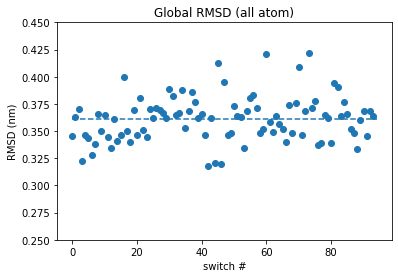

In [48]:
plt.scatter(range(len(rmsds)), rmsds)
plt.xlabel("switch #")
plt.ylabel("RMSD (nm)")
plt.ylim([0.25, 0.45])
plt.hlines(np.mean(rmsds), 0, len(rmsds), linestyles='dashed')
plt.title('Global RMSD (all atom)')
plt.show()

## Align and compute rmsd for N501Y region

In [49]:
SA_sliced = pdb.atom_slice(SA_indices)


In [50]:
for res in SA_sliced.topology.residues:
    if res.resSeq == 501 and res.chain.index == 0:
        mutated_res = res
query_indices = [atom.index for atom in mutated_res.atoms]
solute_atoms = list(SA_sliced.topology.select("is_protein"))
neighboring_atoms = list(md.compute_neighbors(SA_sliced, 0.5, query_indices, haystack_indices=solute_atoms)[0])
neighboring_residues_SA = set([atom.residue.index for atom in SA_sliced.topology.atoms if atom.index in neighboring_atoms])
neighboring_residue_info = set([(atom.residue.chain.index, atom.residue.resSeq, atom.residue.name) for atom in SA_sliced.topology.atoms if atom.index in neighboring_atoms])
neighboring_atoms_SA = [atom.index for atom in SA_sliced.topology.atoms if atom.residue.index in neighboring_residues_SA]

In [51]:
WT_sliced = traj.atom_slice(WT_indices)


In [52]:
neighboring_residues_WT = []
for residue in WT_sliced.topology.residues:
    for info in neighboring_residue_info:
        if info[0] == residue.chain.index and info[1] == residue.resSeq and info[2] == residue.name:
            print(residue)
            neighboring_residues_WT.append(residue.index)


ASN439
SER443
TYR495
GLY496
PHE497
GLN498
PRO499
THR500
TYR501
GLY502
VAL503
TYR505
GLN506
PRO507
GLU37
ASP38
TYR41
GLY352
LYS353
GLY354
ASP355


In [53]:
neighboring_atoms_WT = [atom.index for atom in WT_sliced.topology.atoms if atom.residue.index in neighboring_residues_WT]

In [54]:
WT_sliced = WT_sliced.superpose(SA_sliced, atom_indices=neighboring_atoms_WT, ref_atom_indices=neighboring_atoms_SA)


In [55]:
rmsds = md.rmsd(WT_sliced, SA_sliced, atom_indices=neighboring_atoms_WT, ref_atom_indices=neighboring_atoms_SA)



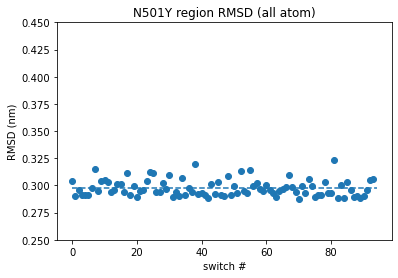

In [59]:
plt.scatter(range(len(rmsds)), rmsds)
plt.xlabel("switch #")
plt.ylabel("RMSD (nm)")
plt.ylim([0.25, 0.45])
plt.hlines(np.mean(rmsds), 0, len(rmsds), linestyles='dashed')
plt.title('N501Y region RMSD (all atom)')
plt.show()

# Analyze 32/2/0 (not chunked) and load reference structure

In [60]:
outdir = "/data/chodera/zhangi/perses_benchmark/repex/32/2/0/"
i = 0
phase = 'complex'
# endstate = 1
# name = 'tyr'
# is_old = False

# with open(os.path.join(outdir, f"{i}_{phase}.pickle"), "rb") as f:
#     htf = pickle.load(f)
    


In [61]:
traj = md.load(os.path.join(outdir, f"{i}_{phase}_new_state_23.dcd"), top=md.Topology.from_openmm(htf._topology_proposal.new_topology))

In [62]:
# Load reference SA structure
pdb = md.load("SA_rbd_ace2_N501Y_protonated.pdb")


## Align and compute rmsd for all rbd:ace2 indices

In [63]:
count = 0
c_term = list(range(802, 915))
# c_term_glycan = list(range(777, 785))
caps = [0, 195]
rbd_ace2_chains = [0, 2]
residues = []
WT_indices = []
for atom in traj.topology.atoms:
    if atom.residue.chain.index in rbd_ace2_chains:
        if atom.residue.index not in c_term + caps:
            WT_indices.append(atom.index)
            count += 1
            residues.append(atom.residue.index) 
print(count)
print(len(set(residues)))

# The RBD structure has:
# Extra C-term ACE2 residues: (802-914)
# Extra C-term ACE2 glycan (777-784)
# Missing RBD N- and C- term residues (therefore remove the caps) (0, 195)
        

12488
790


In [64]:
SA_indices = pdb.topology.select("(chainid == 0 or chainid == 4) and resi != 0 and resi != 1 and resi != 2 and resi != 197 and resi != 198 and resi != 199 and resi != 200 and resi != 880")


In [65]:
traj = traj.superpose(pdb, atom_indices=WT_indices, ref_atom_indices=SA_indices)


In [66]:
rmsds = md.rmsd(traj, pdb, atom_indices=WT_indices, ref_atom_indices=SA_indices)



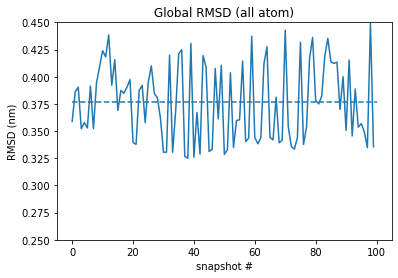

In [67]:
plt.plot(rmsds)
plt.xlabel("snapshot #")
plt.ylabel("RMSD (nm)")
plt.ylim([0.25, 0.45])
plt.hlines(np.mean(rmsds), 0, len(rmsds), linestyles='dashed')
plt.title('Global RMSD (all atom)')
plt.show()

## Align and compute rmsd for N501Y region

In [68]:
SA_sliced = pdb.atom_slice(SA_indices)


In [69]:
for res in SA_sliced.topology.residues:
    if res.resSeq == 501 and res.chain.index == 0:
        mutated_res = res
query_indices = [atom.index for atom in mutated_res.atoms]
solute_atoms = list(SA_sliced.topology.select("is_protein"))
neighboring_atoms = list(md.compute_neighbors(SA_sliced, 0.5, query_indices, haystack_indices=solute_atoms)[0])
neighboring_residues_SA = set([atom.residue.index for atom in SA_sliced.topology.atoms if atom.index in neighboring_atoms])
neighboring_residue_info = set([(atom.residue.chain.index, atom.residue.resSeq, atom.residue.name) for atom in SA_sliced.topology.atoms if atom.index in neighboring_atoms])
neighboring_atoms_SA = [atom.index for atom in SA_sliced.topology.atoms if atom.residue.index in neighboring_residues_SA]

In [70]:
WT_sliced = traj.atom_slice(WT_indices)


In [71]:
neighboring_residues_WT = []
for residue in WT_sliced.topology.residues:
    for info in neighboring_residue_info:
        if info[0] == residue.chain.index and info[1] == residue.resSeq and info[2] == residue.name:
            print(residue)
            neighboring_residues_WT.append(residue.index)


ASN439
SER443
TYR495
GLY496
PHE497
GLN498
PRO499
THR500
TYR501
GLY502
VAL503
TYR505
GLN506
PRO507
GLU37
ASP38
TYR41
GLY352
LYS353
GLY354
ASP355


In [72]:
neighboring_atoms_WT = [atom.index for atom in WT_sliced.topology.atoms if atom.residue.index in neighboring_residues_WT]

In [73]:
WT_sliced = WT_sliced.superpose(SA_sliced, atom_indices=neighboring_atoms_WT, ref_atom_indices=neighboring_atoms_SA)


In [74]:
rmsds = md.rmsd(WT_sliced, SA_sliced, atom_indices=neighboring_atoms_WT, ref_atom_indices=neighboring_atoms_SA)



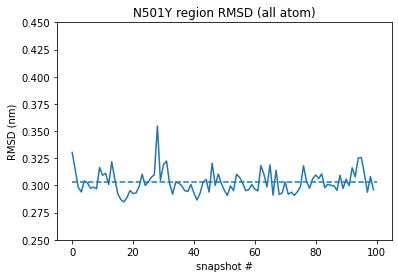

In [75]:
plt.plot(rmsds)
plt.xlabel("snapshot #")
plt.ylabel("RMSD (nm)")
plt.ylim([0.25, 0.45])
plt.hlines(np.mean(rmsds), 0, len(rmsds), linestyles='dashed')
plt.title('N501Y region RMSD (all atom)')
plt.show()

# Analyze 32/0/9 (chunked) and load reference structure

In [76]:
outdir = "/data/chodera/zhangi/perses_benchmark/repex/32/0/9/"
i = 9
phase = 'complex'
# endstate = 1
# name = 'tyr'
# is_old = False

# with open(os.path.join(outdir, f"{i}_{phase}.pickle"), "rb") as f:
#     htf = pickle.load(f)
    


In [77]:
traj = md.load(os.path.join(outdir, f"{i}_{phase}_new_state_11.dcd"), top=md.Topology.from_openmm(htf._topology_proposal.new_topology))

In [78]:
# Load reference SA structure
pdb = md.load("SA_rbd_ace2_N501Y_protonated.pdb")


## Align and compute rmsd for all rbd:ace2 indices

In [79]:
count = 0
c_term = list(range(802, 915))
# c_term_glycan = list(range(777, 785))
caps = [0, 195]
rbd_ace2_chains = [0, 2]
residues = []
WT_indices = []
for atom in traj.topology.atoms:
    if atom.residue.chain.index in rbd_ace2_chains:
        if atom.residue.index not in c_term + caps:
            WT_indices.append(atom.index)
            count += 1
            residues.append(atom.residue.index) 
print(count)
print(len(set(residues)))

# The RBD structure has:
# Extra C-term ACE2 residues: (802-914)
# Extra C-term ACE2 glycan (777-784)
# Missing RBD N- and C- term residues (therefore remove the caps) (0, 195)
        

12488
790


In [80]:
SA_indices = pdb.topology.select("(chainid == 0 or chainid == 4) and resi != 0 and resi != 1 and resi != 2 and resi != 197 and resi != 198 and resi != 199 and resi != 200 and resi != 880")


In [81]:
traj = traj.superpose(pdb, atom_indices=WT_indices, ref_atom_indices=SA_indices)


In [82]:
rmsds = md.rmsd(traj, pdb, atom_indices=WT_indices, ref_atom_indices=SA_indices)



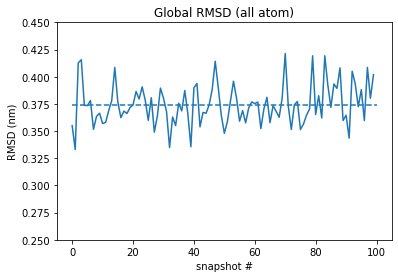

In [83]:
plt.plot(rmsds)
plt.xlabel("snapshot #")
plt.ylabel("RMSD (nm)")
plt.ylim([0.25, 0.45])
plt.hlines(np.mean(rmsds), 0, len(rmsds), linestyles='dashed')
plt.title('Global RMSD (all atom)')
plt.show()

## Align and compute rmsd for N501Y region

In [84]:
SA_sliced = pdb.atom_slice(SA_indices)


In [85]:
for res in SA_sliced.topology.residues:
    if res.resSeq == 501 and res.chain.index == 0:
        mutated_res = res
query_indices = [atom.index for atom in mutated_res.atoms]
solute_atoms = list(SA_sliced.topology.select("is_protein"))
neighboring_atoms = list(md.compute_neighbors(SA_sliced, 0.5, query_indices, haystack_indices=solute_atoms)[0])
neighboring_residues_SA = set([atom.residue.index for atom in SA_sliced.topology.atoms if atom.index in neighboring_atoms])
neighboring_residue_info = set([(atom.residue.chain.index, atom.residue.resSeq, atom.residue.name) for atom in SA_sliced.topology.atoms if atom.index in neighboring_atoms])
neighboring_atoms_SA = [atom.index for atom in SA_sliced.topology.atoms if atom.residue.index in neighboring_residues_SA]

In [86]:
WT_sliced = traj.atom_slice(WT_indices)


In [87]:
neighboring_residues_WT = []
for residue in WT_sliced.topology.residues:
    for info in neighboring_residue_info:
        if info[0] == residue.chain.index and info[1] == residue.resSeq and info[2] == residue.name:
            print(residue)
            neighboring_residues_WT.append(residue.index)


ASN439
SER443
TYR495
GLY496
PHE497
GLN498
PRO499
THR500
TYR501
GLY502
VAL503
TYR505
GLN506
PRO507
GLU37
ASP38
TYR41
GLY352
LYS353
GLY354
ASP355


In [88]:
neighboring_atoms_WT = [atom.index for atom in WT_sliced.topology.atoms if atom.residue.index in neighboring_residues_WT]

In [89]:
WT_sliced = WT_sliced.superpose(SA_sliced, atom_indices=neighboring_atoms_WT, ref_atom_indices=neighboring_atoms_SA)


In [90]:
rmsds = md.rmsd(WT_sliced, SA_sliced, atom_indices=neighboring_atoms_WT, ref_atom_indices=neighboring_atoms_SA)



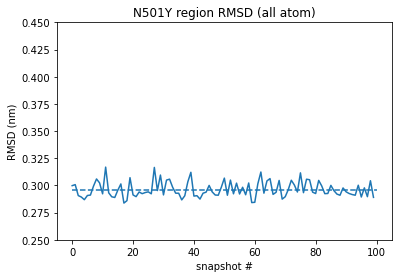

In [91]:
plt.plot(rmsds)
plt.xlabel("snapshot #")
plt.ylabel("RMSD (nm)")
plt.ylim([0.25, 0.45])
plt.hlines(np.mean(rmsds), 0, len(rmsds), linestyles='dashed')
plt.title('N501Y region RMSD (all atom)')
plt.show()

In [204]:
SA_sliced.save("test.pdb")

In [11]:
for residue in traj.topology.residues:
    print(residue.chain.index, residue.index, residue)

0 0 ACE332
0 1 THR333
0 2 ASN334
0 3 LEU335
0 4 CYS336
0 5 PRO337
0 6 PHE338
0 7 GLY339
0 8 GLU340
0 9 VAL341
0 10 PHE342
0 11 NLN343
0 12 ALA344
0 13 THR345
0 14 ARG346
0 15 PHE347
0 16 ALA348
0 17 SER349
0 18 VAL350
0 19 TYR351
0 20 ALA352
0 21 TRP353
0 22 ASN354
0 23 ARG355
0 24 LYS356
0 25 ARG357
0 26 ILE358
0 27 SER359
0 28 ASN360
0 29 CYS361
0 30 VAL362
0 31 ALA363
0 32 ASP364
0 33 TYR365
0 34 SER366
0 35 VAL367
0 36 LEU368
0 37 TYR369
0 38 ASN370
0 39 SER371
0 40 ALA372
0 41 SER373
0 42 PHE374
0 43 SER375
0 44 THR376
0 45 PHE377
0 46 LYS378
0 47 CYS379
0 48 TYR380
0 49 GLY381
0 50 VAL382
0 51 SER383
0 52 PRO384
0 53 THR385
0 54 LYS386
0 55 LEU387
0 56 ASN388
0 57 ASP389
0 58 LEU390
0 59 CYS391
0 60 PHE392
0 61 THR393
0 62 ASN394
0 63 VAL395
0 64 TYR396
0 65 ALA397
0 66 ASP398
0 67 SER399
0 68 PHE400
0 69 VAL401
0 70 ILE402
0 71 ARG403
0 72 GLY404
0 73 ASP405
0 74 GLU406
0 75 VAL407
0 76 ARG408
0 77 GLN409
0 78 ILE410
0 79 ALA411
0 80 PRO412
0 81 GLY413
0 82 GLN414
0 83 THR415
0 

2 843 PHE655
2 844 LEU656
2 845 LYS657
2 846 VAL658
2 847 LYS659
2 848 ASN660
2 849 GLN661
2 850 MET662
2 851 ILE663
2 852 LEU664
2 853 PHE665
2 854 GLY666
2 855 GLU667
2 856 GLU668
2 857 ASP669
2 858 VAL670
2 859 ARG671
2 860 VAL672
2 861 ALA673
2 862 ASN674
2 863 LEU675
2 864 LYS676
2 865 PRO677
2 866 ARG678
2 867 ILE679
2 868 SER680
2 869 PHE681
2 870 ASN682
2 871 PHE683
2 872 PHE684
2 873 VAL685
2 874 THR686
2 875 ALA687
2 876 PRO688
2 877 LYS689
2 878 NLN690
2 879 VAL691
2 880 SER692
2 881 ASP693
2 882 ILE694
2 883 ILE695
2 884 PRO696
2 885 ARG697
2 886 THR698
2 887 GLU699
2 888 VAL700
2 889 GLU701
2 890 LYS702
2 891 ALA703
2 892 ILE704
2 893 ARG705
2 894 MET706
2 895 SER707
2 896 ARG708
2 897 SER709
2 898 ARG710
2 899 ILE711
2 900 ASN712
2 901 ASP713
2 902 ALA714
2 903 PHE715
2 904 ARG716
2 905 LEU717
2 906 ASN718
2 907 ASP719
2 908 ASN720
2 909 SER721
2 910 LEU722
2 911 GLU723
2 912 PHE724
2 913 LEU725
2 914 NME726
3 915 CL785
3 916 ZN786
4 917 UYB727
4 918 4YB728
4 919 VMB729
4

5 1843 HOH1849
5 1844 HOH1850
5 1845 HOH1851
5 1846 HOH1852
5 1847 HOH1853
5 1848 HOH1854
5 1849 HOH1855
5 1850 HOH1856
5 1851 HOH1857
5 1852 HOH1858
5 1853 HOH1859
5 1854 HOH1860
5 1855 HOH1861
5 1856 HOH1862
5 1857 HOH1863
5 1858 HOH1864
5 1859 HOH1865
5 1860 HOH1866
5 1861 HOH1867
5 1862 HOH1869
5 1863 HOH1870
5 1864 HOH1871
5 1865 HOH1872
5 1866 HOH1873
5 1867 HOH1874
5 1868 HOH1875
5 1869 HOH1876
5 1870 HOH1877
5 1871 HOH1878
5 1872 HOH1879
5 1873 HOH1880
5 1874 HOH1881
5 1875 HOH1882
5 1876 HOH1883
5 1877 HOH1884
5 1878 HOH1885
5 1879 HOH1886
5 1880 HOH1887
5 1881 HOH1888
5 1882 HOH1889
5 1883 HOH1890
5 1884 HOH1891
5 1885 HOH1892
5 1886 HOH1893
5 1887 HOH1894
5 1888 HOH1895
5 1889 HOH1896
5 1890 HOH1897
5 1891 HOH1898
5 1892 HOH1899
5 1893 HOH1900
5 1894 HOH1901
5 1895 HOH1902
5 1896 HOH1903
5 1897 HOH1904
5 1898 HOH1905
5 1899 HOH1906
5 1900 HOH1907
5 1901 HOH1908
5 1902 HOH1909
5 1903 HOH1910
5 1904 HOH1911
5 1905 HOH1912
5 1906 HOH1913
5 1907 HOH1914
5 1908 HOH1915
5 1909 HOH

5 2843 HOH2856
5 2844 HOH2857
5 2845 HOH2858
5 2846 HOH2859
5 2847 HOH2860
5 2848 HOH2861
5 2849 HOH2862
5 2850 HOH2863
5 2851 HOH2864
5 2852 HOH2865
5 2853 HOH2866
5 2854 HOH2867
5 2855 HOH2868
5 2856 HOH2869
5 2857 HOH2870
5 2858 HOH2871
5 2859 HOH2872
5 2860 HOH2873
5 2861 HOH2874
5 2862 HOH2875
5 2863 HOH2876
5 2864 HOH2877
5 2865 HOH2878
5 2866 HOH2879
5 2867 HOH2880
5 2868 HOH2881
5 2869 HOH2882
5 2870 HOH2883
5 2871 HOH2884
5 2872 HOH2885
5 2873 HOH2886
5 2874 HOH2887
5 2875 HOH2888
5 2876 HOH2889
5 2877 HOH2890
5 2878 HOH2891
5 2879 HOH2892
5 2880 HOH2893
5 2881 HOH2894
5 2882 HOH2895
5 2883 HOH2896
5 2884 HOH2897
5 2885 HOH2898
5 2886 HOH2899
5 2887 HOH2900
5 2888 HOH2901
5 2889 HOH2902
5 2890 HOH2903
5 2891 HOH2904
5 2892 HOH2905
5 2893 HOH2906
5 2894 HOH2907
5 2895 HOH2908
5 2896 HOH2909
5 2897 HOH2910
5 2898 HOH2911
5 2899 HOH2912
5 2900 HOH2913
5 2901 HOH2914
5 2902 HOH2915
5 2903 HOH2916
5 2904 HOH2917
5 2905 HOH2918
5 2906 HOH2919
5 2907 HOH2920
5 2908 HOH2921
5 2909 HOH

5 3842 HOH3867
5 3843 HOH3868
5 3844 HOH3869
5 3845 HOH3870
5 3846 HOH3871
5 3847 HOH3872
5 3848 HOH3873
5 3849 HOH3874
5 3850 HOH3875
5 3851 HOH3876
5 3852 HOH3877
5 3853 HOH3878
5 3854 HOH3879
5 3855 HOH3880
5 3856 HOH3881
5 3857 HOH3882
5 3858 HOH3883
5 3859 HOH3884
5 3860 HOH3885
5 3861 HOH3886
5 3862 HOH3887
5 3863 HOH3888
5 3864 HOH3889
5 3865 HOH3890
5 3866 HOH3891
5 3867 HOH3892
5 3868 HOH3893
5 3869 HOH3894
5 3870 HOH3895
5 3871 HOH3896
5 3872 HOH3897
5 3873 HOH3898
5 3874 HOH3899
5 3875 HOH3900
5 3876 HOH3901
5 3877 HOH3902
5 3878 HOH3903
5 3879 HOH3904
5 3880 HOH3905
5 3881 HOH3906
5 3882 HOH3907
5 3883 HOH3908
5 3884 HOH3909
5 3885 HOH3910
5 3886 HOH3911
5 3887 HOH3912
5 3888 HOH3913
5 3889 HOH3914
5 3890 HOH3915
5 3891 HOH3916
5 3892 HOH3917
5 3893 HOH3918
5 3894 HOH3919
5 3895 HOH3920
5 3896 HOH3921
5 3897 HOH3922
5 3898 HOH3923
5 3899 HOH3924
5 3900 HOH3925
5 3901 HOH3926
5 3902 HOH3927
5 3903 HOH3928
5 3904 HOH3929
5 3905 HOH3930
5 3906 HOH3931
5 3907 HOH3932
5 3908 HOH

5 4842 HOH4874
5 4843 HOH4875
5 4844 HOH4876
5 4845 HOH4877
5 4846 HOH4878
5 4847 HOH4879
5 4848 HOH4880
5 4849 HOH4881
5 4850 HOH4882
5 4851 HOH4883
5 4852 HOH4884
5 4853 HOH4885
5 4854 HOH4886
5 4855 HOH4887
5 4856 HOH4888
5 4857 HOH4889
5 4858 HOH4890
5 4859 HOH4891
5 4860 HOH4892
5 4861 HOH4893
5 4862 HOH4894
5 4863 HOH4895
5 4864 HOH4896
5 4865 HOH4897
5 4866 HOH4898
5 4867 HOH4899
5 4868 HOH4901
5 4869 HOH4902
5 4870 HOH4903
5 4871 HOH4904
5 4872 HOH4905
5 4873 HOH4906
5 4874 HOH4907
5 4875 HOH4908
5 4876 HOH4909
5 4877 HOH4910
5 4878 HOH4911
5 4879 HOH4912
5 4880 HOH4913
5 4881 HOH4914
5 4882 HOH4915
5 4883 HOH4916
5 4884 HOH4917
5 4885 HOH4918
5 4886 HOH4919
5 4887 HOH4920
5 4888 HOH4921
5 4889 HOH4922
5 4890 HOH4923
5 4891 HOH4924
5 4892 HOH4925
5 4893 HOH4926
5 4894 HOH4927
5 4895 HOH4928
5 4896 HOH4929
5 4897 HOH4930
5 4898 HOH4931
5 4899 HOH4932
5 4900 HOH4933
5 4901 HOH4934
5 4902 HOH4935
5 4903 HOH4936
5 4904 HOH4937
5 4905 HOH4938
5 4906 HOH4939
5 4907 HOH4940
5 4908 HOH

5 5842 HOH5879
5 5843 HOH5880
5 5844 HOH5881
5 5845 HOH5882
5 5846 HOH5883
5 5847 HOH5884
5 5848 HOH5885
5 5849 HOH5886
5 5850 HOH5887
5 5851 HOH5888
5 5852 HOH5889
5 5853 HOH5890
5 5854 HOH5891
5 5855 HOH5892
5 5856 HOH5893
5 5857 HOH5894
5 5858 HOH5895
5 5859 HOH5896
5 5860 HOH5897
5 5861 HOH5898
5 5862 HOH5899
5 5863 HOH5900
5 5864 HOH5901
5 5865 HOH5902
5 5866 HOH5903
5 5867 HOH5904
5 5868 HOH5905
5 5869 HOH5906
5 5870 HOH5907
5 5871 HOH5908
5 5872 HOH5909
5 5873 HOH5910
5 5874 HOH5911
5 5875 HOH5912
5 5876 HOH5913
5 5877 HOH5914
5 5878 HOH5915
5 5879 HOH5916
5 5880 HOH5917
5 5881 HOH5918
5 5882 HOH5919
5 5883 HOH5920
5 5884 HOH5921
5 5885 HOH5922
5 5886 HOH5923
5 5887 HOH5924
5 5888 HOH5925
5 5889 HOH5926
5 5890 HOH5927
5 5891 HOH5928
5 5892 HOH5929
5 5893 HOH5930
5 5894 HOH5931
5 5895 HOH5932
5 5896 HOH5933
5 5897 HOH5934
5 5898 HOH5935
5 5899 HOH5936
5 5900 HOH5937
5 5901 HOH5938
5 5902 HOH5939
5 5903 HOH5940
5 5904 HOH5941
5 5905 HOH5942
5 5906 HOH5943
5 5907 HOH5944
5 5908 HOH

5 6842 HOH6887
5 6843 HOH6888
5 6844 HOH6889
5 6845 HOH6890
5 6846 HOH6891
5 6847 HOH6892
5 6848 HOH6893
5 6849 HOH6894
5 6850 HOH6895
5 6851 HOH6896
5 6852 HOH6897
5 6853 HOH6898
5 6854 HOH6899
5 6855 HOH6900
5 6856 HOH6901
5 6857 HOH6902
5 6858 HOH6903
5 6859 HOH6904
5 6860 HOH6905
5 6861 HOH6906
5 6862 HOH6907
5 6863 HOH6909
5 6864 HOH6910
5 6865 HOH6911
5 6866 HOH6912
5 6867 HOH6913
5 6868 HOH6914
5 6869 HOH6915
5 6870 HOH6916
5 6871 HOH6917
5 6872 HOH6918
5 6873 HOH6919
5 6874 HOH6920
5 6875 HOH6921
5 6876 HOH6922
5 6877 HOH6923
5 6878 HOH6924
5 6879 HOH6925
5 6880 HOH6926
5 6881 HOH6927
5 6882 HOH6928
5 6883 HOH6929
5 6884 HOH6930
5 6885 HOH6931
5 6886 HOH6932
5 6887 HOH6933
5 6888 HOH6934
5 6889 HOH6935
5 6890 HOH6936
5 6891 HOH6937
5 6892 HOH6938
5 6893 HOH6939
5 6894 HOH6940
5 6895 HOH6941
5 6896 HOH6942
5 6897 HOH6943
5 6898 HOH6944
5 6899 HOH6945
5 6900 HOH6946
5 6901 HOH6947
5 6902 HOH6948
5 6903 HOH6949
5 6904 HOH6950
5 6905 HOH6951
5 6906 HOH6952
5 6907 HOH6953
5 6908 HOH

5 7842 HOH7897
5 7843 HOH7898
5 7844 HOH7899
5 7845 HOH7900
5 7846 HOH7901
5 7847 HOH7902
5 7848 HOH7903
5 7849 HOH7904
5 7850 HOH7905
5 7851 HOH7906
5 7852 HOH7907
5 7853 HOH7908
5 7854 HOH7909
5 7855 HOH7910
5 7856 HOH7911
5 7857 HOH7912
5 7858 HOH7913
5 7859 HOH7914
5 7860 HOH7915
5 7861 HOH7916
5 7862 HOH7917
5 7863 HOH7918
5 7864 HOH7919
5 7865 HOH7920
5 7866 HOH7921
5 7867 HOH7922
5 7868 HOH7923
5 7869 HOH7924
5 7870 HOH7925
5 7871 HOH7926
5 7872 HOH7927
5 7873 HOH7928
5 7874 HOH7929
5 7875 HOH7930
5 7876 HOH7931
5 7877 HOH7932
5 7878 HOH7933
5 7879 HOH7934
5 7880 HOH7935
5 7881 HOH7936
5 7882 HOH7937
5 7883 HOH7938
5 7884 HOH7939
5 7885 HOH7940
5 7886 HOH7941
5 7887 HOH7942
5 7888 HOH7943
5 7889 HOH7944
5 7890 HOH7945
5 7891 HOH7946
5 7892 HOH7947
5 7893 HOH7948
5 7894 HOH7949
5 7895 HOH7950
5 7896 HOH7951
5 7897 HOH7952
5 7898 HOH7953
5 7899 HOH7954
5 7900 HOH7955
5 7901 HOH7956
5 7902 HOH7957
5 7903 HOH7958
5 7904 HOH7959
5 7905 HOH7960
5 7906 HOH7961
5 7907 HOH7962
5 7908 HOH

5 8842 HOH8900
5 8843 HOH8901
5 8844 HOH8902
5 8845 HOH8903
5 8846 HOH8904
5 8847 HOH8905
5 8848 HOH8906
5 8849 HOH8907
5 8850 HOH8908
5 8851 HOH8909
5 8852 HOH8910
5 8853 HOH8911
5 8854 HOH8912
5 8855 HOH8913
5 8856 HOH8914
5 8857 HOH8915
5 8858 HOH8916
5 8859 HOH8917
5 8860 HOH8918
5 8861 HOH8919
5 8862 HOH8920
5 8863 HOH8921
5 8864 HOH8922
5 8865 HOH8923
5 8866 HOH8924
5 8867 HOH8925
5 8868 HOH8926
5 8869 HOH8927
5 8870 HOH8928
5 8871 HOH8929
5 8872 HOH8930
5 8873 HOH8931
5 8874 HOH8932
5 8875 HOH8933
5 8876 HOH8934
5 8877 HOH8935
5 8878 HOH8936
5 8879 HOH8937
5 8880 HOH8938
5 8881 HOH8939
5 8882 HOH8940
5 8883 HOH8941
5 8884 HOH8942
5 8885 HOH8943
5 8886 HOH8944
5 8887 HOH8945
5 8888 HOH8946
5 8889 HOH8947
5 8890 HOH8948
5 8891 HOH8949
5 8892 HOH8950
5 8893 HOH8951
5 8894 HOH8952
5 8895 HOH8953
5 8896 HOH8954
5 8897 HOH8955
5 8898 HOH8956
5 8899 HOH8957
5 8900 HOH8958
5 8901 HOH8959
5 8902 HOH8960
5 8903 HOH8961
5 8904 HOH8962
5 8905 HOH8963
5 8906 HOH8964
5 8907 HOH8965
5 8908 HOH

5 9841 HOH9904
5 9842 HOH9905
5 9843 HOH9906
5 9844 HOH9907
5 9845 HOH9908
5 9846 HOH9909
5 9847 HOH9910
5 9848 HOH9911
5 9849 HOH9912
5 9850 HOH9913
5 9851 HOH9914
5 9852 HOH9915
5 9853 HOH9916
5 9854 HOH9917
5 9855 HOH9918
5 9856 HOH9919
5 9857 HOH9920
5 9858 HOH9921
5 9859 HOH9922
5 9860 HOH9923
5 9861 HOH9924
5 9862 HOH9925
5 9863 HOH9926
5 9864 HOH9927
5 9865 HOH9928
5 9866 HOH9929
5 9867 HOH9930
5 9868 HOH9931
5 9869 HOH9932
5 9870 HOH9933
5 9871 HOH9934
5 9872 HOH9935
5 9873 HOH9936
5 9874 HOH9937
5 9875 HOH9938
5 9876 HOH9939
5 9877 HOH9940
5 9878 HOH9941
5 9879 HOH9942
5 9880 HOH9943
5 9881 HOH9944
5 9882 HOH9945
5 9883 HOH9946
5 9884 HOH9947
5 9885 HOH9948
5 9886 HOH9949
5 9887 HOH9950
5 9888 HOH9951
5 9889 HOH9952
5 9890 HOH9953
5 9891 HOH9954
5 9892 HOH9955
5 9893 HOH9956
5 9894 HOH9957
5 9895 HOH9958
5 9896 HOH9959
5 9897 HOH9960
5 9898 HOH9961
5 9899 HOH9962
5 9900 HOH9963
5 9901 HOH9964
5 9902 HOH9965
5 9903 HOH9966
5 9904 HOH9967
5 9905 HOH9968
5 9906 HOH9969
5 9907 HOH

5 10841 HOH10910
5 10842 HOH10911
5 10843 HOH10912
5 10844 HOH10913
5 10845 HOH10914
5 10846 HOH10915
5 10847 HOH10916
5 10848 HOH10917
5 10849 HOH10918
5 10850 HOH10919
5 10851 HOH10920
5 10852 HOH10921
5 10853 HOH10922
5 10854 HOH10923
5 10855 HOH10924
5 10856 HOH10925
5 10857 HOH10926
5 10858 HOH10927
5 10859 HOH10928
5 10860 HOH10929
5 10861 HOH10930
5 10862 HOH10931
5 10863 HOH10932
5 10864 HOH10933
5 10865 HOH10934
5 10866 HOH10935
5 10867 HOH10936
5 10868 HOH10937
5 10869 HOH10938
5 10870 HOH10939
5 10871 HOH10940
5 10872 HOH10941
5 10873 HOH10942
5 10874 HOH10943
5 10875 HOH10944
5 10876 HOH10945
5 10877 HOH10946
5 10878 HOH10947
5 10879 HOH10948
5 10880 HOH10949
5 10881 HOH10950
5 10882 HOH10951
5 10883 HOH10952
5 10884 HOH10953
5 10885 HOH10954
5 10886 HOH10955
5 10887 HOH10956
5 10888 HOH10957
5 10889 HOH10958
5 10890 HOH10959
5 10891 HOH10960
5 10892 HOH10961
5 10893 HOH10962
5 10894 HOH10963
5 10895 HOH10964
5 10896 HOH10965
5 10897 HOH10966
5 10898 HOH10967
5 10899 HOH109

5 11841 HOH11913
5 11842 HOH11914
5 11843 HOH11915
5 11844 HOH11916
5 11845 HOH11917
5 11846 HOH11918
5 11847 HOH11919
5 11848 HOH11920
5 11849 HOH11921
5 11850 HOH11922
5 11851 HOH11923
5 11852 HOH11924
5 11853 HOH11925
5 11854 HOH11926
5 11855 HOH11927
5 11856 HOH11928
5 11857 HOH11929
5 11858 HOH11930
5 11859 HOH11931
5 11860 HOH11932
5 11861 HOH11933
5 11862 HOH11934
5 11863 HOH11935
5 11864 HOH11936
5 11865 HOH11937
5 11866 HOH11938
5 11867 HOH11939
5 11868 HOH11940
5 11869 HOH11941
5 11870 HOH11942
5 11871 HOH11943
5 11872 HOH11944
5 11873 HOH11945
5 11874 HOH11946
5 11875 HOH11947
5 11876 HOH11948
5 11877 HOH11949
5 11878 HOH11950
5 11879 HOH11951
5 11880 HOH11952
5 11881 HOH11953
5 11882 HOH11954
5 11883 HOH11955
5 11884 HOH11956
5 11885 HOH11957
5 11886 HOH11958
5 11887 HOH11959
5 11888 HOH11960
5 11889 HOH11961
5 11890 HOH11962
5 11891 HOH11963
5 11892 HOH11964
5 11893 HOH11965
5 11894 HOH11966
5 11895 HOH11967
5 11896 HOH11968
5 11897 HOH11969
5 11898 HOH11970
5 11899 HOH119

5 12841 HOH12918
5 12842 HOH12919
5 12843 HOH12920
5 12844 HOH12921
5 12845 HOH12922
5 12846 HOH12923
5 12847 HOH12924
5 12848 HOH12925
5 12849 HOH12926
5 12850 HOH12927
5 12851 HOH12928
5 12852 HOH12929
5 12853 HOH12930
5 12854 HOH12931
5 12855 HOH12932
5 12856 HOH12933
5 12857 HOH12934
5 12858 HOH12935
5 12859 HOH12936
5 12860 HOH12937
5 12861 HOH12938
5 12862 HOH12939
5 12863 HOH12940
5 12864 HOH12941
5 12865 HOH12942
5 12866 HOH12943
5 12867 HOH12944
5 12868 HOH12945
5 12869 HOH12946
5 12870 HOH12947
5 12871 HOH12948
5 12872 HOH12949
5 12873 HOH12950
5 12874 HOH12951
5 12875 HOH12952
5 12876 HOH12953
5 12877 HOH12954
5 12878 HOH12955
5 12879 HOH12956
5 12880 HOH12957
5 12881 HOH12958
5 12882 HOH12959
5 12883 HOH12960
5 12884 HOH12961
5 12885 HOH12962
5 12886 HOH12963
5 12887 HOH12964
5 12888 HOH12965
5 12889 HOH12966
5 12890 HOH12967
5 12891 HOH12968
5 12892 HOH12969
5 12893 HOH12970
5 12894 HOH12971
5 12895 HOH12972
5 12896 HOH12973
5 12897 HOH12974
5 12898 HOH12975
5 12899 HOH129

5 13841 HOH13925
5 13842 HOH13926
5 13843 HOH13927
5 13844 HOH13928
5 13845 HOH13929
5 13846 HOH13930
5 13847 HOH13931
5 13848 HOH13932
5 13849 HOH13933
5 13850 HOH13934
5 13851 HOH13935
5 13852 HOH13936
5 13853 HOH13937
5 13854 HOH13938
5 13855 HOH13939
5 13856 HOH13940
5 13857 HOH13941
5 13858 HOH13942
5 13859 HOH13943
5 13860 HOH13944
5 13861 HOH13945
5 13862 HOH13946
5 13863 HOH13947
5 13864 HOH13948
5 13865 HOH13949
5 13866 HOH13950
5 13867 HOH13951
5 13868 HOH13952
5 13869 HOH13953
5 13870 HOH13954
5 13871 HOH13955
5 13872 HOH13956
5 13873 HOH13957
5 13874 HOH13958
5 13875 HOH13959
5 13876 HOH13960
5 13877 HOH13961
5 13878 HOH13962
5 13879 HOH13963
5 13880 HOH13964
5 13881 HOH13965
5 13882 HOH13966
5 13883 HOH13967
5 13884 HOH13968
5 13885 HOH13969
5 13886 HOH13970
5 13887 HOH13971
5 13888 HOH13972
5 13889 HOH13973
5 13890 HOH13974
5 13891 HOH13975
5 13892 HOH13976
5 13893 HOH13977
5 13894 HOH13978
5 13895 HOH13979
5 13896 HOH13980
5 13897 HOH13981
5 13898 HOH13982
5 13899 HOH139

5 14841 HOH14929
5 14842 HOH14930
5 14843 HOH14931
5 14844 HOH14933
5 14845 HOH14934
5 14846 HOH14935
5 14847 HOH14936
5 14848 HOH14937
5 14849 HOH14938
5 14850 HOH14939
5 14851 HOH14940
5 14852 HOH14941
5 14853 HOH14942
5 14854 HOH14943
5 14855 HOH14944
5 14856 HOH14945
5 14857 HOH14946
5 14858 HOH14947
5 14859 HOH14948
5 14860 HOH14949
5 14861 HOH14950
5 14862 HOH14951
5 14863 HOH14952
5 14864 HOH14953
5 14865 HOH14954
5 14866 HOH14955
5 14867 HOH14956
5 14868 HOH14957
5 14869 HOH14958
5 14870 HOH14959
5 14871 HOH14960
5 14872 HOH14961
5 14873 HOH14962
5 14874 HOH14963
5 14875 HOH14964
5 14876 HOH14965
5 14877 HOH14966
5 14878 HOH14967
5 14879 HOH14968
5 14880 HOH14969
5 14881 HOH14970
5 14882 HOH14971
5 14883 HOH14973
5 14884 HOH14974
5 14885 HOH14975
5 14886 HOH14976
5 14887 HOH14977
5 14888 HOH14978
5 14889 HOH14979
5 14890 HOH14980
5 14891 HOH14981
5 14892 HOH14982
5 14893 HOH14983
5 14894 HOH14984
5 14895 HOH14985
5 14896 HOH14986
5 14897 HOH14987
5 14898 HOH14988
5 14899 HOH149

5 15840 HOH15934
5 15841 HOH15935
5 15842 HOH15936
5 15843 HOH15937
5 15844 HOH15938
5 15845 HOH15939
5 15846 HOH15940
5 15847 HOH15941
5 15848 HOH15942
5 15849 HOH15943
5 15850 HOH15944
5 15851 HOH15945
5 15852 HOH15946
5 15853 HOH15947
5 15854 HOH15948
5 15855 HOH15949
5 15856 HOH15950
5 15857 HOH15951
5 15858 HOH15952
5 15859 HOH15953
5 15860 HOH15954
5 15861 HOH15955
5 15862 HOH15956
5 15863 HOH15957
5 15864 HOH15958
5 15865 HOH15959
5 15866 HOH15960
5 15867 HOH15961
5 15868 HOH15962
5 15869 HOH15963
5 15870 HOH15964
5 15871 HOH15965
5 15872 HOH15966
5 15873 HOH15967
5 15874 HOH15968
5 15875 HOH15969
5 15876 HOH15970
5 15877 HOH15971
5 15878 HOH15972
5 15879 HOH15973
5 15880 HOH15974
5 15881 HOH15975
5 15882 HOH15976
5 15883 HOH15977
5 15884 HOH15978
5 15885 HOH15979
5 15886 HOH15980
5 15887 HOH15981
5 15888 HOH15982
5 15889 HOH15983
5 15890 HOH15984
5 15891 HOH15985
5 15892 HOH15986
5 15893 HOH15987
5 15894 HOH15988
5 15895 HOH15989
5 15896 HOH15990
5 15897 HOH15991
5 15898 HOH159

5 16840 HOH16940
5 16841 HOH16941
5 16842 HOH16942
5 16843 HOH16943
5 16844 HOH16944
5 16845 HOH16945
5 16846 HOH16946
5 16847 HOH16947
5 16848 HOH16948
5 16849 HOH16949
5 16850 HOH16950
5 16851 HOH16951
5 16852 HOH16952
5 16853 HOH16953
5 16854 HOH16954
5 16855 HOH16955
5 16856 HOH16956
5 16857 HOH16957
5 16858 HOH16958
5 16859 HOH16959
5 16860 HOH16960
5 16861 HOH16961
5 16862 HOH16962
5 16863 HOH16963
5 16864 HOH16964
5 16865 HOH16965
5 16866 HOH16966
5 16867 HOH16967
5 16868 HOH16968
5 16869 HOH16969
5 16870 HOH16970
5 16871 HOH16971
5 16872 HOH16972
5 16873 HOH16973
5 16874 HOH16974
5 16875 HOH16975
5 16876 HOH16976
5 16877 HOH16977
5 16878 HOH16978
5 16879 HOH16979
5 16880 HOH16980
5 16881 HOH16981
5 16882 HOH16982
5 16883 HOH16983
5 16884 HOH16984
5 16885 HOH16985
5 16886 HOH16986
5 16887 HOH16987
5 16888 HOH16988
5 16889 HOH16989
5 16890 HOH16990
5 16891 HOH16991
5 16892 HOH16992
5 16893 HOH16993
5 16894 HOH16994
5 16895 HOH16995
5 16896 HOH16996
5 16897 HOH16997
5 16898 HOH169

5 17840 HOH17949
5 17841 HOH17950
5 17842 HOH17951
5 17843 HOH17952
5 17844 HOH17953
5 17845 HOH17954
5 17846 HOH17955
5 17847 HOH17956
5 17848 HOH17957
5 17849 HOH17958
5 17850 HOH17959
5 17851 HOH17961
5 17852 HOH17962
5 17853 HOH17963
5 17854 HOH17964
5 17855 HOH17965
5 17856 HOH17966
5 17857 HOH17967
5 17858 HOH17968
5 17859 HOH17969
5 17860 HOH17970
5 17861 HOH17971
5 17862 HOH17972
5 17863 HOH17973
5 17864 HOH17974
5 17865 HOH17975
5 17866 HOH17976
5 17867 HOH17977
5 17868 HOH17978
5 17869 HOH17979
5 17870 HOH17980
5 17871 HOH17981
5 17872 HOH17982
5 17873 HOH17983
5 17874 HOH17984
5 17875 HOH17985
5 17876 HOH17986
5 17877 HOH17987
5 17878 HOH17988
5 17879 HOH17989
5 17880 HOH17990
5 17881 HOH17991
5 17882 HOH17992
5 17883 HOH17993
5 17884 HOH17994
5 17885 HOH17995
5 17886 HOH17996
5 17887 HOH17997
5 17888 HOH17998
5 17889 HOH17999
5 17890 HOH18000
5 17891 HOH18001
5 17892 HOH18002
5 17893 HOH18003
5 17894 HOH18004
5 17895 HOH18005
5 17896 HOH18006
5 17897 HOH18007
5 17898 HOH180

5 18840 HOH18959
5 18841 HOH18960
5 18842 HOH18961
5 18843 HOH18962
5 18844 HOH18963
5 18845 HOH18964
5 18846 HOH18965
5 18847 HOH18966
5 18848 HOH18967
5 18849 HOH18968
5 18850 HOH18969
5 18851 HOH18970
5 18852 HOH18971
5 18853 HOH18972
5 18854 HOH18973
5 18855 HOH18974
5 18856 HOH18975
5 18857 HOH18976
5 18858 HOH18977
5 18859 HOH18978
5 18860 HOH18979
5 18861 HOH18980
5 18862 HOH18981
5 18863 HOH18982
5 18864 HOH18983
5 18865 HOH18984
5 18866 HOH18985
5 18867 HOH18986
5 18868 HOH18987
5 18869 HOH18988
5 18870 HOH18989
5 18871 HOH18990
5 18872 HOH18991
5 18873 HOH18992
5 18874 HOH18993
5 18875 HOH18994
5 18876 HOH18995
5 18877 HOH18996
5 18878 HOH18997
5 18879 HOH18998
5 18880 HOH18999
5 18881 HOH19000
5 18882 HOH19001
5 18883 HOH19002
5 18884 HOH19003
5 18885 HOH19004
5 18886 HOH19005
5 18887 HOH19006
5 18888 HOH19007
5 18889 HOH19008
5 18890 HOH19009
5 18891 HOH19010
5 18892 HOH19011
5 18893 HOH19012
5 18894 HOH19013
5 18895 HOH19014
5 18896 HOH19015
5 18897 HOH19016
5 18898 HOH190

5 19840 HOH19963
5 19841 HOH19964
5 19842 HOH19965
5 19843 HOH19966
5 19844 HOH19967
5 19845 HOH19968
5 19846 HOH19969
5 19847 HOH19970
5 19848 HOH19971
5 19849 HOH19972
5 19850 HOH19973
5 19851 HOH19974
5 19852 HOH19975
5 19853 HOH19976
5 19854 HOH19977
5 19855 HOH19978
5 19856 HOH19979
5 19857 HOH19980
5 19858 HOH19981
5 19859 HOH19982
5 19860 HOH19983
5 19861 HOH19984
5 19862 HOH19985
5 19863 HOH19986
5 19864 HOH19987
5 19865 HOH19988
5 19866 HOH19989
5 19867 HOH19990
5 19868 HOH19991
5 19869 HOH19992
5 19870 HOH19993
5 19871 HOH19994
5 19872 HOH19995
5 19873 HOH19996
5 19874 HOH19997
5 19875 HOH19998
5 19876 HOH19999
5 19877 HOH20000
5 19878 HOH20001
5 19879 HOH20002
5 19880 HOH20003
5 19881 HOH20004
5 19882 HOH20005
5 19883 HOH20006
5 19884 HOH20007
5 19885 HOH20008
5 19886 HOH20009
5 19887 HOH20010
5 19888 HOH20011
5 19889 HOH20012
5 19890 HOH20013
5 19891 HOH20014
5 19892 HOH20015
5 19893 HOH20016
5 19894 HOH20017
5 19895 HOH20018
5 19896 HOH20019
5 19897 HOH20020
5 19898 HOH200

5 20840 HOH20970
5 20841 HOH20971
5 20842 HOH20972
5 20843 HOH20973
5 20844 HOH20974
5 20845 HOH20975
5 20846 HOH20976
5 20847 HOH20977
5 20848 HOH20978
5 20849 HOH20979
5 20850 HOH20980
5 20851 HOH20981
5 20852 HOH20982
5 20853 HOH20983
5 20854 HOH20984
5 20855 HOH20985
5 20856 HOH20986
5 20857 HOH20987
5 20858 HOH20988
5 20859 HOH20989
5 20860 HOH20990
5 20861 HOH20991
5 20862 HOH20992
5 20863 HOH20994
5 20864 HOH20995
5 20865 HOH20996
5 20866 HOH20997
5 20867 HOH20998
5 20868 HOH20999
5 20869 HOH21000
5 20870 HOH21001
5 20871 HOH21002
5 20872 HOH21003
5 20873 HOH21004
5 20874 HOH21005
5 20875 HOH21006
5 20876 HOH21007
5 20877 HOH21008
5 20878 HOH21009
5 20879 HOH21010
5 20880 HOH21011
5 20881 HOH21012
5 20882 HOH21013
5 20883 HOH21014
5 20884 HOH21015
5 20885 HOH21016
5 20886 HOH21017
5 20887 HOH21018
5 20888 HOH21019
5 20889 HOH21020
5 20890 HOH21021
5 20891 HOH21022
5 20892 HOH21023
5 20893 HOH21024
5 20894 HOH21025
5 20895 HOH21026
5 20896 HOH21027
5 20897 HOH21028
5 20898 HOH210

5 21839 HOH21981
5 21840 HOH21982
5 21841 HOH21983
5 21842 HOH21984
5 21843 HOH21985
5 21844 HOH21986
5 21845 HOH21987
5 21846 HOH21988
5 21847 HOH21989
5 21848 HOH21990
5 21849 HOH21991
5 21850 HOH21992
5 21851 HOH21993
5 21852 HOH21994
5 21853 HOH21995
5 21854 HOH21996
5 21855 HOH21997
5 21856 HOH21998
5 21857 HOH21999
5 21858 HOH22000
5 21859 HOH22001
5 21860 HOH22002
5 21861 HOH22003
5 21862 HOH22004
5 21863 HOH22005
5 21864 HOH22006
5 21865 HOH22007
5 21866 HOH22008
5 21867 HOH22009
5 21868 HOH22010
5 21869 HOH22011
5 21870 HOH22012
5 21871 HOH22013
5 21872 HOH22014
5 21873 HOH22015
5 21874 HOH22016
5 21875 HOH22017
5 21876 HOH22018
5 21877 HOH22019
5 21878 HOH22020
5 21879 HOH22021
5 21880 HOH22022
5 21881 HOH22023
5 21882 HOH22024
5 21883 HOH22025
5 21884 HOH22026
5 21885 HOH22027
5 21886 HOH22028
5 21887 HOH22029
5 21888 HOH22030
5 21889 HOH22031
5 21890 HOH22032
5 21891 HOH22033
5 21892 HOH22034
5 21893 HOH22035
5 21894 HOH22036
5 21895 HOH22037
5 21896 HOH22038
5 21897 HOH220

5 22839 HOH22986
5 22840 HOH22987
5 22841 HOH22988
5 22842 HOH22989
5 22843 HOH22990
5 22844 HOH22991
5 22845 HOH22992
5 22846 HOH22993
5 22847 HOH22994
5 22848 HOH22995
5 22849 HOH22996
5 22850 HOH22997
5 22851 HOH22998
5 22852 HOH22999
5 22853 HOH23000
5 22854 HOH23001
5 22855 HOH23002
5 22856 HOH23003
5 22857 HOH23004
5 22858 HOH23005
5 22859 HOH23006
5 22860 HOH23007
5 22861 HOH23008
5 22862 HOH23010
5 22863 HOH23011
5 22864 HOH23012
5 22865 HOH23013
5 22866 HOH23014
5 22867 HOH23015
5 22868 HOH23016
5 22869 HOH23017
5 22870 HOH23018
5 22871 HOH23019
5 22872 HOH23020
5 22873 HOH23021
5 22874 HOH23022
5 22875 HOH23023
5 22876 HOH23024
5 22877 HOH23025
5 22878 HOH23026
5 22879 HOH23027
5 22880 HOH23028
5 22881 HOH23029
5 22882 HOH23030
5 22883 HOH23031
5 22884 HOH23032
5 22885 HOH23033
5 22886 HOH23034
5 22887 HOH23035
5 22888 HOH23036
5 22889 HOH23037
5 22890 HOH23038
5 22891 HOH23039
5 22892 HOH23040
5 22893 HOH23041
5 22894 HOH23042
5 22895 HOH23043
5 22896 HOH23044
5 22897 HOH230

5 23839 HOH23994
5 23840 HOH23995
5 23841 HOH23996
5 23842 HOH23997
5 23843 HOH23998
5 23844 HOH23999
5 23845 HOH24000
5 23846 HOH24001
5 23847 HOH24002
5 23848 HOH24003
5 23849 HOH24004
5 23850 HOH24005
5 23851 HOH24006
5 23852 HOH24007
5 23853 HOH24008
5 23854 HOH24009
5 23855 HOH24010
5 23856 HOH24011
5 23857 HOH24012
5 23858 HOH24013
5 23859 HOH24014
5 23860 HOH24015
5 23861 HOH24016
5 23862 HOH24017
5 23863 HOH24018
5 23864 HOH24019
5 23865 HOH24020
5 23866 HOH24021
5 23867 HOH24022
5 23868 HOH24023
5 23869 HOH24024
5 23870 HOH24025
5 23871 HOH24026
5 23872 HOH24027
5 23873 HOH24028
5 23874 HOH24029
5 23875 HOH24030
5 23876 HOH24031
5 23877 HOH24032
5 23878 HOH24033
5 23879 HOH24034
5 23880 HOH24035
5 23881 HOH24036
5 23882 HOH24037
5 23883 HOH24038
5 23884 HOH24039
5 23885 HOH24040
5 23886 HOH24042
5 23887 HOH24043
5 23888 HOH24044
5 23889 HOH24045
5 23890 HOH24046
5 23891 HOH24047
5 23892 HOH24048
5 23893 HOH24049
5 23894 HOH24050
5 23895 HOH24051
5 23896 HOH24052
5 23897 HOH240

5 24839 HOH24998
5 24840 HOH24999
5 24841 HOH25000
5 24842 HOH25001
5 24843 HOH25002
5 24844 HOH25003
5 24845 HOH25004
5 24846 HOH25005
5 24847 HOH25006
5 24848 HOH25007
5 24849 HOH25008
5 24850 HOH25009
5 24851 HOH25010
5 24852 HOH25011
5 24853 HOH25012
5 24854 HOH25013
5 24855 HOH25014
5 24856 HOH25015
5 24857 HOH25016
5 24858 HOH25017
5 24859 HOH25018
5 24860 HOH25019
5 24861 HOH25020
5 24862 HOH25021
5 24863 HOH25022
5 24864 HOH25023
5 24865 HOH25024
5 24866 HOH25025
5 24867 HOH25026
5 24868 HOH25027
5 24869 HOH25028
5 24870 HOH25029
5 24871 HOH25030
5 24872 HOH25031
5 24873 HOH25032
5 24874 HOH25033
5 24875 HOH25034
5 24876 HOH25035
5 24877 HOH25036
5 24878 HOH25037
5 24879 HOH25038
5 24880 HOH25039
5 24881 HOH25040
5 24882 HOH25041
5 24883 HOH25042
5 24884 HOH25043
5 24885 HOH25044
5 24886 HOH25045
5 24887 HOH25046
5 24888 HOH25047
5 24889 HOH25048
5 24890 HOH25049
5 24891 HOH25050
5 24892 HOH25051
5 24893 HOH25052
5 24894 HOH25053
5 24895 HOH25054
5 24896 HOH25055
5 24897 HOH250

5 25839 HOH26001
5 25840 HOH26002
5 25841 HOH26003
5 25842 HOH26004
5 25843 HOH26005
5 25844 HOH26006
5 25845 HOH26007
5 25846 HOH26008
5 25847 HOH26009
5 25848 HOH26010
5 25849 HOH26011
5 25850 HOH26012
5 25851 HOH26013
5 25852 HOH26014
5 25853 HOH26015
5 25854 HOH26016
5 25855 HOH26017
5 25856 HOH26018
5 25857 HOH26019
5 25858 HOH26020
5 25859 HOH26021
5 25860 HOH26022
5 25861 HOH26023
5 25862 HOH26024
5 25863 HOH26025
5 25864 HOH26026
5 25865 HOH26027
5 25866 HOH26028
5 25867 HOH26029
5 25868 HOH26030
5 25869 HOH26031
5 25870 HOH26032
5 25871 HOH26033
5 25872 HOH26034
5 25873 HOH26035
5 25874 HOH26036
5 25875 HOH26037
5 25876 HOH26038
5 25877 HOH26039
5 25878 HOH26040
5 25879 HOH26041
5 25880 HOH26042
5 25881 HOH26043
5 25882 HOH26044
5 25883 HOH26045
5 25884 HOH26046
5 25885 HOH26047
5 25886 HOH26048
5 25887 HOH26049
5 25888 HOH26050
5 25889 HOH26051
5 25890 HOH26052
5 25891 HOH26053
5 25892 HOH26054
5 25893 HOH26055
5 25894 HOH26056
5 25895 HOH26057
5 25896 HOH26058
5 25897 HOH260

5 26839 HOH27006
5 26840 HOH27007
5 26841 HOH27008
5 26842 HOH27009
5 26843 HOH27010
5 26844 HOH27011
5 26845 HOH27012
5 26846 HOH27013
5 26847 HOH27014
5 26848 HOH27015
5 26849 HOH27016
5 26850 HOH27017
5 26851 HOH27018
5 26852 HOH27019
5 26853 HOH27020
5 26854 HOH27021
5 26855 HOH27022
5 26856 HOH27023
5 26857 HOH27024
5 26858 HOH27025
5 26859 HOH27026
5 26860 HOH27027
5 26861 HOH27028
5 26862 HOH27029
5 26863 HOH27030
5 26864 HOH27031
5 26865 HOH27032
5 26866 HOH27033
5 26867 HOH27034
5 26868 HOH27035
5 26869 HOH27036
5 26870 HOH27037
5 26871 HOH27038
5 26872 HOH27039
5 26873 HOH27040
5 26874 HOH27041
5 26875 HOH27042
5 26876 HOH27043
5 26877 HOH27044
5 26878 HOH27045
5 26879 HOH27046
5 26880 HOH27047
5 26881 HOH27048
5 26882 HOH27049
5 26883 HOH27050
5 26884 HOH27051
5 26885 HOH27052
5 26886 HOH27053
5 26887 HOH27054
5 26888 HOH27055
5 26889 HOH27056
5 26890 HOH27057
5 26891 HOH27058
5 26892 HOH27059
5 26893 HOH27060
5 26894 HOH27061
5 26895 HOH27062
5 26896 HOH27063
5 26897 HOH270

5 27838 HOH28013
5 27839 HOH28014
5 27840 HOH28015
5 27841 HOH28016
5 27842 HOH28017
5 27843 HOH28018
5 27844 HOH28019
5 27845 HOH28020
5 27846 HOH28021
5 27847 HOH28022
5 27848 HOH28023
5 27849 HOH28024
5 27850 HOH28025
5 27851 HOH28026
5 27852 HOH28027
5 27853 HOH28028
5 27854 HOH28029
5 27855 HOH28030
5 27856 HOH28031
5 27857 HOH28032
5 27858 HOH28033
5 27859 HOH28034
5 27860 HOH28035
5 27861 HOH28036
5 27862 HOH28037
5 27863 HOH28038
5 27864 HOH28039
5 27865 HOH28040
5 27866 HOH28041
5 27867 HOH28042
5 27868 HOH28043
5 27869 HOH28044
5 27870 HOH28045
5 27871 HOH28046
5 27872 HOH28047
5 27873 HOH28048
5 27874 HOH28049
5 27875 HOH28050
5 27876 HOH28051
5 27877 HOH28052
5 27878 HOH28053
5 27879 HOH28054
5 27880 HOH28056
5 27881 HOH28057
5 27882 HOH28058
5 27883 HOH28059
5 27884 HOH28060
5 27885 HOH28061
5 27886 HOH28062
5 27887 HOH28063
5 27888 HOH28064
5 27889 HOH28065
5 27890 HOH28066
5 27891 HOH28067
5 27892 HOH28068
5 27893 HOH28069
5 27894 HOH28070
5 27895 HOH28071
5 27896 HOH280

5 28838 HOH29024
5 28839 HOH29025
5 28840 HOH29026
5 28841 HOH29027
5 28842 HOH29028
5 28843 HOH29029
5 28844 HOH29030
5 28845 HOH29031
5 28846 HOH29032
5 28847 HOH29033
5 28848 HOH29034
5 28849 HOH29035
5 28850 HOH29036
5 28851 HOH29037
5 28852 HOH29038
5 28853 HOH29039
5 28854 HOH29040
5 28855 HOH29041
5 28856 HOH29042
5 28857 HOH29043
5 28858 HOH29044
5 28859 HOH29045
5 28860 HOH29046
5 28861 HOH29047
5 28862 HOH29048
5 28863 HOH29049
5 28864 HOH29050
5 28865 HOH29051
5 28866 HOH29052
5 28867 HOH29053
5 28868 HOH29054
5 28869 HOH29055
5 28870 HOH29056
5 28871 HOH29057
5 28872 HOH29058
5 28873 HOH29059
5 28874 HOH29060
5 28875 HOH29061
5 28876 HOH29062
5 28877 HOH29063
5 28878 HOH29064
5 28879 HOH29065
5 28880 HOH29066
5 28881 HOH29067
5 28882 HOH29068
5 28883 HOH29069
5 28884 HOH29070
5 28885 HOH29071
5 28886 HOH29072
5 28887 HOH29073
5 28888 HOH29074
5 28889 HOH29075
5 28890 HOH29076
5 28891 HOH29077
5 28892 HOH29078
5 28893 HOH29079
5 28894 HOH29080
5 28895 HOH29081
5 28896 HOH290

5 29838 HOH30025
5 29839 HOH30026
5 29840 HOH30027
5 29841 HOH30028
5 29842 HOH30029
5 29843 HOH30030
5 29844 HOH30031
5 29845 HOH30032
5 29846 HOH30033
5 29847 HOH30034
5 29848 HOH30035
5 29849 HOH30036
5 29850 HOH30037
5 29851 HOH30038
5 29852 HOH30039
5 29853 HOH30040
5 29854 HOH30041
5 29855 HOH30042
5 29856 HOH30043
5 29857 HOH30044
5 29858 HOH30045
5 29859 HOH30046
5 29860 HOH30047
5 29861 HOH30048
5 29862 HOH30049
5 29863 HOH30050
5 29864 HOH30051
5 29865 HOH30052
5 29866 HOH30053
5 29867 HOH30054
5 29868 HOH30055
5 29869 HOH30056
5 29870 HOH30057
5 29871 HOH30058
5 29872 HOH30059
5 29873 HOH30060
5 29874 HOH30061
5 29875 HOH30062
5 29876 HOH30063
5 29877 HOH30064
5 29878 HOH30065
5 29879 HOH30066
5 29880 HOH30067
5 29881 HOH30068
5 29882 HOH30069
5 29883 HOH30070
5 29884 HOH30071
5 29885 HOH30072
5 29886 HOH30073
5 29887 HOH30074
5 29888 HOH30075
5 29889 HOH30076
5 29890 HOH30077
5 29891 HOH30078
5 29892 HOH30079
5 29893 HOH30080
5 29894 HOH30081
5 29895 HOH30082
5 29896 HOH300

5 30838 HOH31034
5 30839 HOH31035
5 30840 HOH31036
5 30841 HOH31037
5 30842 HOH31038
5 30843 HOH31039
5 30844 HOH31040
5 30845 HOH31041
5 30846 HOH31042
5 30847 HOH31043
5 30848 HOH31044
5 30849 HOH31045
5 30850 HOH31046
5 30851 HOH31047
5 30852 HOH31048
5 30853 HOH31049
5 30854 HOH31050
5 30855 HOH31051
5 30856 HOH31052
5 30857 HOH31053
5 30858 HOH31054
5 30859 HOH31055
5 30860 HOH31056
5 30861 HOH31057
5 30862 HOH31058
5 30863 HOH31059
5 30864 HOH31060
5 30865 HOH31061
5 30866 HOH31062
5 30867 HOH31063
5 30868 HOH31064
5 30869 HOH31065
5 30870 HOH31066
5 30871 HOH31067
5 30872 HOH31068
5 30873 HOH31069
5 30874 HOH31070
5 30875 HOH31071
5 30876 HOH31072
5 30877 HOH31073
5 30878 HOH31074
5 30879 HOH31076
5 30880 HOH31077
5 30881 HOH31078
5 30882 HOH31079
5 30883 HOH31080
5 30884 HOH31081
5 30885 HOH31082
5 30886 HOH31083
5 30887 HOH31084
5 30888 HOH31085
5 30889 HOH31086
5 30890 HOH31087
5 30891 HOH31088
5 30892 HOH31089
5 30893 HOH31090
5 30894 HOH31091
5 30895 HOH31092
5 30896 HOH310

5 31838 HOH32039
5 31839 HOH32040
5 31840 HOH32041
5 31841 HOH32042
5 31842 HOH32043
5 31843 HOH32044
5 31844 HOH32045
5 31845 HOH32046
5 31846 HOH32047
5 31847 HOH32048
5 31848 HOH32049
5 31849 HOH32050
5 31850 HOH32051
5 31851 HOH32052
5 31852 HOH32053
5 31853 HOH32054
5 31854 HOH32055
5 31855 HOH32056
5 31856 HOH32057
5 31857 HOH32058
5 31858 HOH32059
5 31859 HOH32060
5 31860 HOH32061
5 31861 HOH32062
5 31862 HOH32063
5 31863 HOH32064
5 31864 HOH32065
5 31865 HOH32066
5 31866 HOH32067
5 31867 HOH32068
5 31868 HOH32069
5 31869 HOH32070
5 31870 HOH32071
5 31871 HOH32072
5 31872 HOH32073
5 31873 HOH32074
5 31874 HOH32075
5 31875 HOH32076
5 31876 HOH32078
5 31877 HOH32079
5 31878 HOH32080
5 31879 HOH32081
5 31880 HOH32082
5 31881 HOH32083
5 31882 HOH32084
5 31883 HOH32085
5 31884 HOH32086
5 31885 HOH32087
5 31886 HOH32088
5 31887 HOH32089
5 31888 HOH32090
5 31889 HOH32091
5 31890 HOH32092
5 31891 HOH32093
5 31892 HOH32094
5 31893 HOH32095
5 31894 HOH32096
5 31895 HOH32097
5 31896 HOH320

5 32838 HOH33043
5 32839 HOH33044
5 32840 HOH33045
5 32841 HOH33046
5 32842 HOH33047
5 32843 HOH33048
5 32844 HOH33049
5 32845 HOH33050
5 32846 HOH33051
5 32847 HOH33052
5 32848 HOH33053
5 32849 HOH33054
5 32850 HOH33055
5 32851 HOH33056
5 32852 HOH33057
5 32853 HOH33058
5 32854 HOH33059
5 32855 HOH33060
5 32856 HOH33061
5 32857 HOH33062
5 32858 HOH33063
5 32859 HOH33064
5 32860 HOH33065
5 32861 HOH33066
5 32862 HOH33067
5 32863 HOH33068
5 32864 HOH33069
5 32865 HOH33070
5 32866 HOH33071
5 32867 HOH33072
5 32868 HOH33073
5 32869 HOH33074
5 32870 HOH33075
5 32871 HOH33076
5 32872 HOH33077
5 32873 HOH33078
5 32874 HOH33079
5 32875 HOH33080
5 32876 HOH33081
5 32877 HOH33082
5 32878 HOH33083
5 32879 HOH33084
5 32880 HOH33085
5 32881 HOH33086
5 32882 HOH33087
5 32883 HOH33088
5 32884 HOH33089
5 32885 HOH33090
5 32886 HOH33091
5 32887 HOH33092
5 32888 HOH33093
5 32889 HOH33094
5 32890 HOH33095
5 32891 HOH33096
5 32892 HOH33097
5 32893 HOH33098
5 32894 HOH33099
5 32895 HOH33100
5 32896 HOH331

5 33837 HOH34047
5 33838 HOH34048
5 33839 HOH34049
5 33840 HOH34050
5 33841 HOH34051
5 33842 HOH34052
5 33843 HOH34053
5 33844 HOH34054
5 33845 HOH34055
5 33846 HOH34056
5 33847 HOH34057
5 33848 HOH34058
5 33849 HOH34059
5 33850 HOH34060
5 33851 HOH34061
5 33852 HOH34062
5 33853 HOH34063
5 33854 HOH34064
5 33855 HOH34065
5 33856 HOH34066
5 33857 HOH34067
5 33858 HOH34068
5 33859 HOH34069
5 33860 HOH34070
5 33861 HOH34071
5 33862 HOH34072
5 33863 HOH34073
5 33864 HOH34074
5 33865 HOH34075
5 33866 HOH34076
5 33867 HOH34077
5 33868 HOH34078
5 33869 HOH34079
5 33870 HOH34080
5 33871 HOH34081
5 33872 HOH34082
5 33873 HOH34083
5 33874 HOH34084
5 33875 HOH34085
5 33876 HOH34087
5 33877 HOH34088
5 33878 HOH34089
5 33879 HOH34090
5 33880 HOH34091
5 33881 HOH34092
5 33882 HOH34093
5 33883 HOH34094
5 33884 HOH34095
5 33885 HOH34096
5 33886 HOH34097
5 33887 HOH34098
5 33888 HOH34099
5 33889 HOH34100
5 33890 HOH34101
5 33891 HOH34102
5 33892 HOH34103
5 33893 HOH34104
5 33894 HOH34105
5 33895 HOH341

5 34837 HOH35055
5 34838 HOH35056
5 34839 HOH35057
5 34840 HOH35058
5 34841 HOH35059
5 34842 HOH35060
5 34843 HOH35061
5 34844 HOH35062
5 34845 HOH35063
5 34846 HOH35064
5 34847 HOH35065
5 34848 HOH35066
5 34849 HOH35067
5 34850 HOH35068
5 34851 HOH35069
5 34852 HOH35070
5 34853 HOH35071
5 34854 HOH35072
5 34855 HOH35073
5 34856 HOH35074
5 34857 HOH35075
5 34858 HOH35076
5 34859 HOH35077
5 34860 HOH35078
5 34861 HOH35079
5 34862 HOH35080
5 34863 HOH35081
5 34864 HOH35082
5 34865 HOH35083
5 34866 HOH35084
5 34867 HOH35085
5 34868 HOH35086
5 34869 HOH35087
5 34870 HOH35088
5 34871 HOH35089
5 34872 HOH35090
5 34873 HOH35091
5 34874 HOH35092
5 34875 HOH35093
5 34876 HOH35094
5 34877 HOH35095
5 34878 HOH35096
5 34879 HOH35097
5 34880 HOH35098
5 34881 HOH35099
5 34882 HOH35100
5 34883 HOH35101
5 34884 HOH35102
5 34885 HOH35103
5 34886 HOH35104
5 34887 HOH35105
5 34888 HOH35106
5 34889 HOH35107
5 34890 HOH35108
5 34891 HOH35109
5 34892 HOH35110
5 34893 HOH35111
5 34894 HOH35112
5 34895 HOH351

5 35837 HOH36058
5 35838 HOH36059
5 35839 HOH36060
5 35840 HOH36061
5 35841 HOH36062
5 35842 HOH36063
5 35843 HOH36064
5 35844 HOH36065
5 35845 HOH36066
5 35846 HOH36067
5 35847 HOH36068
5 35848 HOH36069
5 35849 HOH36070
5 35850 HOH36071
5 35851 HOH36072
5 35852 HOH36073
5 35853 HOH36074
5 35854 HOH36075
5 35855 HOH36076
5 35856 HOH36077
5 35857 HOH36078
5 35858 HOH36079
5 35859 HOH36080
5 35860 HOH36081
5 35861 HOH36082
5 35862 HOH36083
5 35863 HOH36084
5 35864 HOH36085
5 35865 HOH36086
5 35866 HOH36087
5 35867 HOH36088
5 35868 HOH36089
5 35869 HOH36090
5 35870 HOH36091
5 35871 HOH36092
5 35872 HOH36093
5 35873 HOH36094
5 35874 HOH36095
5 35875 HOH36096
5 35876 HOH36097
5 35877 HOH36098
5 35878 HOH36099
5 35879 HOH36100
5 35880 HOH36101
5 35881 HOH36102
5 35882 HOH36103
5 35883 HOH36104
5 35884 HOH36105
5 35885 HOH36106
5 35886 HOH36107
5 35887 HOH36108
5 35888 HOH36109
5 35889 HOH36110
5 35890 HOH36111
5 35891 HOH36112
5 35892 HOH36113
5 35893 HOH36114
5 35894 HOH36115
5 35895 HOH361

5 36837 HOH37062
5 36838 HOH37063
5 36839 HOH37064
5 36840 HOH37065
5 36841 HOH37066
5 36842 HOH37067
5 36843 HOH37068
5 36844 HOH37069
5 36845 HOH37070
5 36846 HOH37071
5 36847 HOH37072
5 36848 HOH37073
5 36849 HOH37074
5 36850 HOH37075
5 36851 HOH37076
5 36852 HOH37077
5 36853 HOH37078
5 36854 HOH37079
5 36855 HOH37080
5 36856 HOH37081
5 36857 HOH37082
5 36858 HOH37083
5 36859 HOH37084
5 36860 HOH37085
5 36861 HOH37086
5 36862 HOH37087
5 36863 HOH37088
5 36864 HOH37089
5 36865 HOH37090
5 36866 HOH37091
5 36867 HOH37092
5 36868 HOH37093
5 36869 HOH37094
5 36870 HOH37095
5 36871 HOH37096
5 36872 HOH37097
5 36873 HOH37098
5 36874 HOH37099
5 36875 HOH37100
5 36876 HOH37101
5 36877 HOH37102
5 36878 HOH37103
5 36879 HOH37104
5 36880 HOH37105
5 36881 HOH37106
5 36882 HOH37107
5 36883 HOH37108
5 36884 HOH37109
5 36885 HOH37110
5 36886 HOH37111
5 36887 HOH37112
5 36888 HOH37113
5 36889 HOH37114
5 36890 HOH37115
5 36891 HOH37116
5 36892 HOH37117
5 36893 HOH37118
5 36894 HOH37119
5 36895 HOH371

5 37837 HOH38068
5 37838 HOH38069
5 37839 HOH38070
5 37840 HOH38071
5 37841 HOH38072
5 37842 HOH38073
5 37843 HOH38074
5 37844 HOH38075
5 37845 HOH38076
5 37846 HOH38077
5 37847 HOH38078
5 37848 HOH38079
5 37849 HOH38080
5 37850 HOH38081
5 37851 HOH38082
5 37852 HOH38083
5 37853 HOH38084
5 37854 HOH38085
5 37855 HOH38086
5 37856 HOH38087
5 37857 HOH38088
5 37858 HOH38089
5 37859 HOH38090
5 37860 HOH38091
5 37861 HOH38092
5 37862 HOH38093
5 37863 HOH38094
5 37864 HOH38095
5 37865 HOH38096
5 37866 HOH38097
5 37867 HOH38098
5 37868 HOH38099
5 37869 HOH38100
5 37870 HOH38101
5 37871 HOH38102
5 37872 HOH38103
5 37873 HOH38104
5 37874 HOH38105
5 37875 HOH38106
5 37876 HOH38107
5 37877 HOH38108
5 37878 HOH38109
5 37879 HOH38110
5 37880 HOH38111
5 37881 HOH38112
5 37882 HOH38113
5 37883 HOH38114
5 37884 HOH38115
5 37885 HOH38116
5 37886 HOH38117
5 37887 HOH38118
5 37888 HOH38119
5 37889 HOH38120
5 37890 HOH38121
5 37891 HOH38122
5 37892 HOH38123
5 37893 HOH38124
5 37894 HOH38125
5 37895 HOH381

5 38837 HOH39070
5 38838 HOH39071
5 38839 HOH39072
5 38840 HOH39073
5 38841 HOH39074
5 38842 HOH39075
5 38843 HOH39076
5 38844 HOH39077
5 38845 HOH39078
5 38846 HOH39079
5 38847 HOH39080
5 38848 HOH39081
5 38849 HOH39082
5 38850 HOH39083
5 38851 HOH39084
5 38852 HOH39085
5 38853 HOH39086
5 38854 HOH39087
5 38855 HOH39088
5 38856 HOH39089
5 38857 HOH39090
5 38858 HOH39091
5 38859 HOH39092
5 38860 HOH39093
5 38861 HOH39094
5 38862 HOH39095
5 38863 HOH39096
5 38864 HOH39097
5 38865 HOH39098
5 38866 HOH39099
5 38867 HOH39100
5 38868 HOH39101
5 38869 HOH39102
5 38870 HOH39103
5 38871 HOH39104
5 38872 HOH39105
5 38873 HOH39106
5 38874 HOH39107
5 38875 HOH39108
5 38876 HOH39109
5 38877 HOH39110
5 38878 HOH39111
5 38879 HOH39112
5 38880 HOH39113
5 38881 HOH39114
5 38882 HOH39115
5 38883 HOH39116
5 38884 HOH39117
5 38885 HOH39118
5 38886 HOH39119
5 38887 HOH39120
5 38888 HOH39121
5 38889 HOH39122
5 38890 HOH39123
5 38891 HOH39124
5 38892 HOH39125
5 38893 HOH39126
5 38894 HOH39127
5 38895 HOH391

5 39836 HOH40074
5 39837 HOH40075
5 39838 HOH40076
5 39839 HOH40077
5 39840 HOH40078
5 39841 HOH40079
5 39842 HOH40080
5 39843 HOH40081
5 39844 HOH40082
5 39845 HOH40083
5 39846 HOH40084
5 39847 HOH40085
5 39848 HOH40086
5 39849 HOH40087
5 39850 HOH40088
5 39851 HOH40089
5 39852 HOH40090
5 39853 HOH40091
5 39854 HOH40092
5 39855 HOH40093
5 39856 HOH40094
5 39857 HOH40095
5 39858 HOH40096
5 39859 HOH40097
5 39860 HOH40098
5 39861 HOH40099
5 39862 HOH40100
5 39863 HOH40101
5 39864 HOH40102
5 39865 HOH40103
5 39866 HOH40104
5 39867 HOH40105
5 39868 HOH40106
5 39869 HOH40107
5 39870 HOH40108
5 39871 HOH40109
5 39872 HOH40110
5 39873 HOH40111
5 39874 HOH40112
5 39875 HOH40113
5 39876 HOH40114
5 39877 HOH40115
5 39878 HOH40116
5 39879 HOH40117
5 39880 HOH40118
5 39881 HOH40119
5 39882 HOH40120
5 39883 HOH40121
5 39884 HOH40122
5 39885 HOH40123
5 39886 HOH40124
5 39887 HOH40125
5 39888 HOH40126
5 39889 HOH40127
5 39890 HOH40128
5 39891 HOH40129
5 39892 HOH40130
5 39893 HOH40131
5 39894 HOH401

5 40836 HOH41079
5 40837 HOH41080
5 40838 HOH41081
5 40839 HOH41082
5 40840 HOH41083
5 40841 HOH41084
5 40842 HOH41085
5 40843 HOH41086
5 40844 HOH41087
5 40845 HOH41088
5 40846 HOH41089
5 40847 HOH41090
5 40848 HOH41091
5 40849 HOH41092
5 40850 HOH41093
5 40851 HOH41094
5 40852 HOH41095
5 40853 HOH41096
5 40854 HOH41097
5 40855 HOH41098
5 40856 HOH41099
5 40857 HOH41100
5 40858 HOH41101
5 40859 HOH41102
5 40860 HOH41103
5 40861 HOH41104
5 40862 HOH41105
5 40863 HOH41106
5 40864 HOH41107
5 40865 HOH41108
5 40866 HOH41109
5 40867 HOH41110
5 40868 HOH41111
5 40869 HOH41112
5 40870 HOH41113
5 40871 HOH41114
5 40872 HOH41115
5 40873 HOH41116
5 40874 HOH41117
5 40875 HOH41118
5 40876 HOH41119
5 40877 HOH41120
5 40878 HOH41121
5 40879 HOH41122
5 40880 HOH41123
5 40881 HOH41124
5 40882 HOH41125
5 40883 HOH41126
5 40884 HOH41127
5 40885 HOH41128
5 40886 HOH41129
5 40887 HOH41130
5 40888 HOH41131
5 40889 HOH41132
5 40890 HOH41133
5 40891 HOH41134
5 40892 HOH41135
5 40893 HOH41136
5 40894 HOH411

5 41836 HOH42084
5 41837 HOH42085
5 41838 HOH42086
5 41839 HOH42087
5 41840 HOH42088
5 41841 HOH42089
5 41842 HOH42090
5 41843 HOH42091
5 41844 HOH42092
5 41845 HOH42093
5 41846 HOH42094
5 41847 HOH42095
5 41848 HOH42096
5 41849 HOH42097
5 41850 HOH42098
5 41851 HOH42099
5 41852 HOH42100
5 41853 HOH42101
5 41854 HOH42102
5 41855 HOH42103
5 41856 HOH42104
5 41857 HOH42105
5 41858 HOH42106
5 41859 HOH42107
5 41860 HOH42108
5 41861 HOH42109
5 41862 HOH42110
5 41863 HOH42111
5 41864 HOH42112
5 41865 HOH42113
5 41866 HOH42114
5 41867 HOH42115
5 41868 HOH42116
5 41869 HOH42117
5 41870 HOH42118
5 41871 HOH42119
5 41872 HOH42120
5 41873 HOH42121
5 41874 HOH42122
5 41875 HOH42123
5 41876 HOH42124
5 41877 HOH42125
5 41878 HOH42126
5 41879 HOH42127
5 41880 HOH42128
5 41881 HOH42129
5 41882 HOH42130
5 41883 HOH42131
5 41884 HOH42132
5 41885 HOH42133
5 41886 HOH42134
5 41887 HOH42135
5 41888 HOH42136
5 41889 HOH42137
5 41890 HOH42138
5 41891 HOH42139
5 41892 HOH42140
5 41893 HOH42141
5 41894 HOH421

5 42836 HOH43090
5 42837 HOH43091
5 42838 HOH43092
5 42839 HOH43093
5 42840 HOH43094
5 42841 HOH43095
5 42842 HOH43096
5 42843 HOH43097
5 42844 HOH43098
5 42845 HOH43099
5 42846 HOH43100
5 42847 HOH43101
5 42848 HOH43102
5 42849 HOH43103
5 42850 HOH43104
5 42851 HOH43105
5 42852 HOH43106
5 42853 HOH43107
5 42854 HOH43108
5 42855 HOH43109
5 42856 HOH43110
5 42857 HOH43111
5 42858 HOH43112
5 42859 HOH43113
5 42860 HOH43114
5 42861 HOH43115
5 42862 HOH43116
5 42863 HOH43117
5 42864 HOH43118
5 42865 HOH43119
5 42866 HOH43120
5 42867 HOH43121
5 42868 HOH43122
5 42869 HOH43123
5 42870 HOH43124
5 42871 HOH43125
5 42872 HOH43126
5 42873 HOH43127
5 42874 HOH43128
5 42875 HOH43129
5 42876 HOH43130
5 42877 HOH43131
5 42878 HOH43132
5 42879 HOH43133
5 42880 HOH43134
5 42881 HOH43135
5 42882 HOH43136
5 42883 HOH43137
5 42884 HOH43138
5 42885 HOH43139
5 42886 HOH43140
5 42887 HOH43141
5 42888 HOH43142
5 42889 HOH43143
5 42890 HOH43144
5 42891 HOH43145
5 42892 HOH43146
5 42893 HOH43147
5 42894 HOH431

5 43836 HOH44094
5 43837 HOH44095
5 43838 HOH44096
5 43839 HOH44097
5 43840 HOH44098
5 43841 HOH44099
5 43842 HOH44100
5 43843 HOH44101
5 43844 HOH44102
5 43845 HOH44103
5 43846 HOH44104
5 43847 HOH44105
5 43848 HOH44106
5 43849 HOH44107
5 43850 HOH44108
5 43851 HOH44109
5 43852 HOH44110
5 43853 HOH44111
5 43854 HOH44112
5 43855 HOH44113
5 43856 HOH44114
5 43857 HOH44115
5 43858 HOH44116
5 43859 HOH44117
5 43860 HOH44118
5 43861 HOH44119
5 43862 HOH44120
5 43863 HOH44121
5 43864 HOH44122
5 43865 HOH44123
5 43866 HOH44124
5 43867 HOH44125
5 43868 HOH44126
5 43869 HOH44127
5 43870 HOH44128
5 43871 HOH44129
5 43872 HOH44130
5 43873 HOH44131
5 43874 HOH44132
5 43875 HOH44133
5 43876 HOH44134
5 43877 HOH44135
5 43878 HOH44136
5 43879 HOH44137
5 43880 HOH44138
5 43881 HOH44139
5 43882 HOH44140
5 43883 HOH44141
5 43884 HOH44142
5 43885 HOH44143
5 43886 HOH44144
5 43887 HOH44145
5 43888 HOH44146
5 43889 HOH44147
5 43890 HOH44148
5 43891 HOH44149
5 43892 HOH44150
5 43893 HOH44151
5 43894 HOH441

5 44836 HOH45096
5 44837 HOH45097
5 44838 HOH45098
5 44839 HOH45099
5 44840 HOH45100
5 44841 HOH45101
5 44842 HOH45102
5 44843 HOH45103
5 44844 HOH45104
5 44845 HOH45105
5 44846 HOH45106
5 44847 HOH45107
5 44848 HOH45108
5 44849 HOH45109
5 44850 HOH45110
5 44851 HOH45111
5 44852 HOH45112
5 44853 HOH45113
5 44854 HOH45114
5 44855 HOH45115
5 44856 HOH45116
5 44857 HOH45117
5 44858 HOH45118
5 44859 HOH45119
5 44860 HOH45120
5 44861 HOH45121
5 44862 HOH45122
5 44863 HOH45123
5 44864 HOH45124
5 44865 HOH45125
5 44866 HOH45126
5 44867 HOH45127
5 44868 HOH45128
5 44869 HOH45129
5 44870 HOH45130
5 44871 HOH45131
5 44872 HOH45132
5 44873 HOH45133
5 44874 HOH45134
5 44875 HOH45135
5 44876 HOH45136
5 44877 HOH45137
5 44878 HOH45138
5 44879 HOH45139
5 44880 HOH45140
5 44881 HOH45141
5 44882 HOH45142
5 44883 HOH45143
5 44884 HOH45144
5 44885 HOH45145
5 44886 HOH45146
5 44887 HOH45147
5 44888 HOH45148
5 44889 HOH45149
5 44890 HOH45150
5 44891 HOH45151
5 44892 HOH45152
5 44893 HOH45153
5 44894 HOH451

5 45835 HOH46100
5 45836 HOH46101
5 45837 HOH46102
5 45838 HOH46103
5 45839 HOH46104
5 45840 HOH46105
5 45841 HOH46106
5 45842 HOH46107
5 45843 HOH46108
5 45844 HOH46109
5 45845 HOH46110
5 45846 HOH46111
5 45847 HOH46112
5 45848 HOH46113
5 45849 HOH46114
5 45850 HOH46115
5 45851 HOH46116
5 45852 HOH46117
5 45853 HOH46118
5 45854 HOH46119
5 45855 HOH46120
5 45856 HOH46121
5 45857 HOH46122
5 45858 HOH46123
5 45859 HOH46124
5 45860 HOH46125
5 45861 HOH46126
5 45862 HOH46127
5 45863 HOH46128
5 45864 HOH46129
5 45865 HOH46130
5 45866 HOH46131
5 45867 HOH46132
5 45868 HOH46133
5 45869 HOH46134
5 45870 HOH46135
5 45871 HOH46136
5 45872 HOH46137
5 45873 HOH46138
5 45874 HOH46139
5 45875 HOH46140
5 45876 HOH46141
5 45877 HOH46142
5 45878 HOH46143
5 45879 HOH46144
5 45880 HOH46145
5 45881 HOH46146
5 45882 HOH46147
5 45883 HOH46148
5 45884 HOH46149
5 45885 HOH46150
5 45886 HOH46151
5 45887 HOH46152
5 45888 HOH46153
5 45889 HOH46154
5 45890 HOH46155
5 45891 HOH46156
5 45892 HOH46157
5 45893 HOH461

5 46835 HOH47105
5 46836 HOH47106
5 46837 HOH47107
5 46838 HOH47108
5 46839 HOH47109
5 46840 HOH47110
5 46841 HOH47111
5 46842 HOH47112
5 46843 HOH47113
5 46844 HOH47114
5 46845 HOH47115
5 46846 HOH47116
5 46847 HOH47117
5 46848 HOH47118
5 46849 HOH47119
5 46850 HOH47120
5 46851 HOH47121
5 46852 HOH47122
5 46853 HOH47123
5 46854 HOH47124
5 46855 HOH47125
5 46856 HOH47126
5 46857 HOH47127
5 46858 HOH47128
5 46859 HOH47129
5 46860 HOH47130
5 46861 HOH47131
5 46862 HOH47132
5 46863 HOH47133
5 46864 HOH47134
5 46865 HOH47135
5 46866 HOH47136
5 46867 HOH47137
5 46868 HOH47138
5 46869 HOH47139
5 46870 HOH47140
5 46871 HOH47141
5 46872 HOH47142
5 46873 HOH47143
5 46874 HOH47144
5 46875 HOH47145
5 46876 HOH47147
5 46877 HOH47148
5 46878 HOH47149
5 46879 HOH47150
5 46880 HOH47151
5 46881 HOH47152
5 46882 HOH47153
5 46883 HOH47154
5 46884 HOH47155
5 46885 HOH47156
5 46886 HOH47157
5 46887 HOH47158
5 46888 HOH47159
5 46889 HOH47160
5 46890 HOH47161
5 46891 HOH47162
5 46892 HOH47163
5 46893 HOH471

5 47835 HOH48116
5 47836 HOH48117
5 47837 HOH48118
5 47838 HOH48119
5 47839 HOH48120
5 47840 HOH48121
5 47841 HOH48122
5 47842 HOH48123
5 47843 HOH48124
5 47844 HOH48125
5 47845 HOH48126
5 47846 HOH48127
5 47847 HOH48128
5 47848 HOH48129
5 47849 HOH48130
5 47850 HOH48131
5 47851 HOH48132
5 47852 HOH48133
5 47853 HOH48134
5 47854 HOH48135
5 47855 HOH48136
5 47856 HOH48137
5 47857 HOH48138
5 47858 HOH48139
5 47859 HOH48140
5 47860 HOH48141
5 47861 HOH48142
5 47862 HOH48143
5 47863 HOH48144
5 47864 HOH48145
5 47865 HOH48146
5 47866 HOH48147
5 47867 HOH48148
5 47868 HOH48149
5 47869 HOH48150
5 47870 HOH48151
5 47871 HOH48152
5 47872 HOH48153
5 47873 HOH48154
5 47874 HOH48155
5 47875 HOH48156
5 47876 HOH48157
5 47877 HOH48158
5 47878 HOH48159
5 47879 HOH48160
5 47880 HOH48161
5 47881 HOH48162
5 47882 HOH48163
5 47883 HOH48164
5 47884 HOH48165
5 47885 HOH48166
5 47886 HOH48167
5 47887 HOH48168
5 47888 HOH48169
5 47889 HOH48170
5 47890 HOH48171
5 47891 HOH48172
5 47892 HOH48173
5 47893 HOH481

5 48835 HOH49125
5 48836 HOH49126
5 48837 HOH49127
5 48838 HOH49128
5 48839 HOH49129
5 48840 HOH49130
5 48841 HOH49131
5 48842 HOH49132
5 48843 HOH49133
5 48844 HOH49134
5 48845 HOH49135
5 48846 HOH49136
5 48847 HOH49137
5 48848 HOH49138
5 48849 HOH49139
5 48850 HOH49140
5 48851 HOH49141
5 48852 HOH49142
5 48853 HOH49143
5 48854 HOH49144
5 48855 HOH49145
5 48856 HOH49146
5 48857 HOH49147
5 48858 HOH49148
5 48859 HOH49149
5 48860 HOH49150
5 48861 HOH49151
5 48862 HOH49152
5 48863 HOH49153
5 48864 HOH49154
5 48865 HOH49155
5 48866 HOH49156
5 48867 HOH49157
5 48868 HOH49158
5 48869 HOH49159
5 48870 HOH49160
5 48871 HOH49161
5 48872 HOH49162
5 48873 HOH49163
5 48874 HOH49164
5 48875 HOH49165
5 48876 HOH49166
5 48877 HOH49167
5 48878 HOH49168
5 48879 HOH49169
5 48880 HOH49170
5 48881 HOH49171
5 48882 HOH49172
5 48883 HOH49173
5 48884 HOH49174
5 48885 HOH49175
5 48886 HOH49176
5 48887 HOH49177
5 48888 HOH49178
5 48889 HOH49179
5 48890 HOH49180
5 48891 HOH49181
5 48892 HOH49182
5 48893 HOH491

5 49835 HOH50130
5 49836 HOH50131
5 49837 HOH50132
5 49838 HOH50133
5 49839 HOH50134
5 49840 HOH50135
5 49841 HOH50136
5 49842 HOH50137
5 49843 HOH50138
5 49844 HOH50139
5 49845 HOH50140
5 49846 HOH50141
5 49847 HOH50142
5 49848 HOH50143
5 49849 HOH50144
5 49850 HOH50145
5 49851 HOH50146
5 49852 HOH50147
5 49853 HOH50148
5 49854 HOH50149
5 49855 HOH50150
5 49856 HOH50151
5 49857 HOH50152
5 49858 HOH50153
5 49859 HOH50154
5 49860 HOH50155
5 49861 HOH50156
5 49862 HOH50157
5 49863 HOH50158
5 49864 HOH50159
5 49865 HOH50160
5 49866 HOH50161
5 49867 HOH50162
5 49868 HOH50163
5 49869 HOH50164
5 49870 HOH50165
5 49871 HOH50166
5 49872 HOH50167
5 49873 HOH50168
5 49874 HOH50169
5 49875 HOH50170
5 49876 HOH50171
5 49877 HOH50172
5 49878 HOH50173
5 49879 HOH50174
5 49880 HOH50175
5 49881 HOH50176
5 49882 HOH50177
5 49883 HOH50178
5 49884 HOH50179
5 49885 HOH50180
5 49886 HOH50181
5 49887 HOH50182
5 49888 HOH50183
5 49889 HOH50184
5 49890 HOH50185
5 49891 HOH50186
5 49892 HOH50187
5 49893 HOH501

5 50835 HOH51132
5 50836 HOH51133
5 50837 HOH51134
5 50838 HOH51135
5 50839 HOH51136
5 50840 HOH51137
5 50841 HOH51138
5 50842 HOH51139
5 50843 HOH51140
5 50844 HOH51141
5 50845 HOH51142
5 50846 HOH51143
5 50847 HOH51144
5 50848 HOH51145
5 50849 HOH51146
5 50850 HOH51147
5 50851 HOH51148
5 50852 HOH51149
5 50853 HOH51150
5 50854 HOH51151
5 50855 HOH51152
5 50856 HOH51153
5 50857 HOH51154
5 50858 HOH51155
5 50859 HOH51156
5 50860 HOH51157
5 50861 HOH51158
5 50862 HOH51159
5 50863 HOH51160
5 50864 HOH51161
5 50865 HOH51162
5 50866 HOH51163
5 50867 HOH51164
5 50868 HOH51165
5 50869 HOH51166
5 50870 HOH51167
5 50871 HOH51168
5 50872 HOH51169
5 50873 HOH51170
5 50874 HOH51171
5 50875 HOH51172
5 50876 HOH51173
5 50877 HOH51174
5 50878 HOH51175
5 50879 HOH51176
5 50880 HOH51177
5 50881 HOH51178
5 50882 HOH51179
5 50883 HOH51180
5 50884 HOH51181
5 50885 HOH51182
5 50886 HOH51183
5 50887 HOH51184
5 50888 HOH51185
5 50889 HOH51186
5 50890 HOH51187
5 50891 HOH51188
5 50892 HOH51189
5 50893 HOH511

5 51834 HOH52137
5 51835 HOH52138
5 51836 HOH52139
5 51837 HOH52140
5 51838 HOH52141
5 51839 HOH52142
5 51840 HOH52143
5 51841 HOH52144
5 51842 HOH52145
5 51843 HOH52146
5 51844 HOH52147
5 51845 HOH52148
5 51846 HOH52149
5 51847 HOH52150
5 51848 HOH52151
5 51849 HOH52152
5 51850 HOH52153
5 51851 HOH52154
5 51852 HOH52155
5 51853 HOH52156
5 51854 HOH52157
5 51855 HOH52158
5 51856 HOH52159
5 51857 HOH52160
5 51858 HOH52161
5 51859 HOH52162
5 51860 HOH52163
5 51861 HOH52164
5 51862 HOH52165
5 51863 HOH52166
5 51864 HOH52167
5 51865 HOH52168
5 51866 HOH52169
5 51867 HOH52170
5 51868 HOH52171
5 51869 HOH52172
5 51870 HOH52173
5 51871 HOH52174
5 51872 HOH52175
5 51873 HOH52176
5 51874 HOH52177
5 51875 HOH52178
5 51876 HOH52179
5 51877 HOH52180
5 51878 HOH52181
5 51879 HOH52182
5 51880 HOH52183
5 51881 HOH52184
5 51882 HOH52185
5 51883 HOH52186
5 51884 HOH52187
5 51885 HOH52188
5 51886 HOH52189
5 51887 HOH52190
5 51888 HOH52191
5 51889 HOH52192
5 51890 HOH52193
5 51891 HOH52194
5 51892 HOH521

5 52834 HOH53141
5 52835 HOH53142
5 52836 HOH53143
5 52837 HOH53144
5 52838 HOH53145
5 52839 HOH53146
5 52840 HOH53147
5 52841 HOH53148
5 52842 HOH53149
5 52843 HOH53150
5 52844 HOH53151
5 52845 HOH53152
5 52846 HOH53153
5 52847 HOH53154
5 52848 HOH53155
5 52849 HOH53156
5 52850 HOH53157
5 52851 HOH53158
5 52852 HOH53159
5 52853 HOH53160
5 52854 HOH53161
5 52855 HOH53162
5 52856 HOH53163
5 52857 HOH53164
5 52858 HOH53165
5 52859 HOH53166
5 52860 HOH53167
5 52861 HOH53168
5 52862 HOH53169
5 52863 HOH53170
5 52864 HOH53171
5 52865 HOH53173
5 52866 HOH53174
5 52867 HOH53175
5 52868 HOH53176
5 52869 HOH53177
5 52870 HOH53178
5 52871 HOH53179
5 52872 HOH53180
5 52873 HOH53181
5 52874 HOH53182
5 52875 HOH53183
5 52876 HOH53184
5 52877 HOH53185
5 52878 HOH53186
5 52879 HOH53187
5 52880 HOH53188
5 52881 HOH53189
5 52882 HOH53190
5 52883 HOH53191
5 52884 HOH53192
5 52885 HOH53193
5 52886 HOH53194
5 52887 HOH53195
5 52888 HOH53196
5 52889 HOH53197
5 52890 HOH53198
5 52891 HOH53199
5 52892 HOH532

5 53834 HOH54145
5 53835 HOH54146
5 53836 HOH54147
5 53837 HOH54148
5 53838 HOH54149
5 53839 HOH54150
5 53840 HOH54151
5 53841 HOH54152
5 53842 HOH54153
5 53843 HOH54154
5 53844 HOH54155
5 53845 HOH54156
5 53846 HOH54157
5 53847 HOH54158
5 53848 HOH54159
5 53849 HOH54160
5 53850 HOH54161
5 53851 HOH54162
5 53852 HOH54163
5 53853 HOH54164
5 53854 HOH54165
5 53855 HOH54166
5 53856 HOH54167
5 53857 HOH54168
5 53858 HOH54169
5 53859 HOH54170
5 53860 HOH54171
5 53861 HOH54172
5 53862 HOH54173
5 53863 HOH54174
5 53864 HOH54175
5 53865 HOH54176
5 53866 HOH54177
5 53867 HOH54178
5 53868 HOH54179
5 53869 HOH54180
5 53870 HOH54181
5 53871 HOH54182
5 53872 HOH54183
5 53873 HOH54184
5 53874 HOH54185
5 53875 HOH54186
5 53876 HOH54187
5 53877 HOH54188
5 53878 HOH54189
5 53879 HOH54190
5 53880 HOH54191
5 53881 HOH54192
5 53882 HOH54193
5 53883 HOH54194
5 53884 HOH54195
5 53885 HOH54196
5 53886 HOH54197
5 53887 HOH54198
5 53888 HOH54199
5 53889 HOH54200
5 53890 HOH54201
5 53891 HOH54202
5 53892 HOH542

5 54834 HOH55149
5 54835 HOH55150
5 54836 HOH55151
5 54837 HOH55152
5 54838 HOH55153
5 54839 HOH55154
5 54840 HOH55155
5 54841 HOH55156
5 54842 HOH55157
5 54843 HOH55158
5 54844 HOH55159
5 54845 HOH55160
5 54846 HOH55161
5 54847 HOH55162
5 54848 HOH55163
5 54849 HOH55164
5 54850 HOH55165
5 54851 HOH55166
5 54852 HOH55167
5 54853 HOH55168
5 54854 HOH55169
5 54855 HOH55170
5 54856 HOH55171
5 54857 HOH55172
5 54858 HOH55173
5 54859 HOH55174
5 54860 HOH55175
5 54861 HOH55176
5 54862 HOH55177
5 54863 HOH55178
5 54864 HOH55180
5 54865 HOH55181
5 54866 HOH55182
5 54867 HOH55183
5 54868 HOH55184
5 54869 HOH55185
5 54870 HOH55186
5 54871 HOH55187
5 54872 HOH55188
5 54873 HOH55189
5 54874 HOH55190
5 54875 HOH55191
5 54876 HOH55192
5 54877 HOH55193
5 54878 HOH55194
5 54879 HOH55195
5 54880 HOH55196
5 54881 HOH55197
5 54882 HOH55198
5 54883 HOH55199
5 54884 HOH55200
5 54885 HOH55201
5 54886 HOH55202
5 54887 HOH55203
5 54888 HOH55204
5 54889 HOH55205
5 54890 HOH55206
5 54891 HOH55207
5 54892 HOH552

5 55834 HOH56153
5 55835 HOH56154
5 55836 HOH56155
5 55837 HOH56156
5 55838 HOH56157
5 55839 HOH56158
5 55840 HOH56159
5 55841 HOH56160
5 55842 HOH56161
5 55843 HOH56162
5 55844 HOH56163
5 55845 HOH56164
5 55846 HOH56165
5 55847 HOH56166
5 55848 HOH56167
5 55849 HOH56168
5 55850 HOH56169
5 55851 HOH56170
5 55852 HOH56171
5 55853 HOH56172
5 55854 HOH56173
5 55855 HOH56174
5 55856 HOH56175
5 55857 HOH56176
5 55858 HOH56177
5 55859 HOH56178
5 55860 HOH56179
5 55861 HOH56180
5 55862 HOH56181
5 55863 HOH56182
5 55864 HOH56183
5 55865 HOH56184
5 55866 HOH56185
5 55867 HOH56186
5 55868 HOH56187
5 55869 HOH56188
5 55870 HOH56189
5 55871 HOH56191
5 55872 HOH56192
5 55873 HOH56193
5 55874 HOH56194
5 55875 HOH56195
5 55876 HOH56196
5 55877 HOH56197
5 55878 HOH56198
5 55879 HOH56199
5 55880 HOH56200
5 55881 HOH56201
5 55882 HOH56202
5 55883 HOH56203
5 55884 HOH56204
5 55885 HOH56205
5 55886 HOH56206
5 55887 HOH56207
5 55888 HOH56208
5 55889 HOH56209
5 55890 HOH56210
5 55891 HOH56211
5 55892 HOH562

5 56834 HOH57159
5 56835 HOH57160
5 56836 HOH57161
5 56837 HOH57162
5 56838 HOH57163
5 56839 HOH57164
5 56840 HOH57165
5 56841 HOH57166
5 56842 HOH57167
5 56843 HOH57168
5 56844 HOH57169
5 56845 HOH57170
5 56846 HOH57171
5 56847 HOH57172
5 56848 HOH57174
5 56849 HOH57175
5 56850 HOH57176
5 56851 HOH57177
5 56852 HOH57178
5 56853 HOH57179
5 56854 HOH57180
5 56855 HOH57181
5 56856 HOH57182
5 56857 HOH57183
5 56858 HOH57184
5 56859 HOH57185
5 56860 HOH57186
5 56861 HOH57187
5 56862 HOH57188
5 56863 HOH57189
5 56864 HOH57190
5 56865 HOH57191
5 56866 HOH57192
5 56867 HOH57193
5 56868 HOH57194
5 56869 HOH57195
5 56870 HOH57196
5 56871 HOH57197
5 56872 HOH57198
5 56873 HOH57199
5 56874 HOH57200
5 56875 HOH57201
5 56876 HOH57202
5 56877 HOH57203
5 56878 HOH57204
5 56879 HOH57205
5 56880 HOH57206
5 56881 HOH57207
5 56882 HOH57208
5 56883 HOH57209
5 56884 HOH57210
5 56885 HOH57211
5 56886 HOH57212
5 56887 HOH57213
5 56888 HOH57214
5 56889 HOH57215
5 56890 HOH57216
5 56891 HOH57217
5 56892 HOH572

In [75]:
count = 0
c_term = list(range(802, 915))
# c_term_glycan = list(range(777, 785))
caps = [0, 195]
rbd_ace2_chains = [0, 2]
residues = []
WT_indices = []
for atom in traj.topology.atoms:
    if atom.residue.chain.index in rbd_ace2_chains:
        if atom.residue.index not in c_term + caps:
            WT_indices.append(atom.index)
            count += 1
            residues.append(atom.residue.index) 
    #             print(atom)
print(count)
print(len(set(residues)))

# The RBD structure has:
# Extra C-term ACE2 residues: (802-914)
# Extra C-term ACE2 glycan (777-784)
# Missing RBD N- and C- term residues (therefore remove the caps) (0, 195)
        

12488
790


In [74]:
traj.atom_slice(traj.topology.select("(chainid == 0 or chainid == 2) and resi != 0 and resi != 195 and not (resi > 802 and res < 915)"))


ValueError: Cannot compare literals.

In [71]:
pdb.atom_slice(pdb.topology.select("(chainid == 0 or chainid == 4) and resi != 0 and resi != 1 and resi != 2 and resi != 197 and resi != 198 and resi != 199 and resi != 200 and resi != 880"))


# The SA structure has:
# Extra N-term RBD residues: ACE-NI (709-711)
# Extra C-term RBD residues: PKK-NME (906-909)
# Missing C-term ACE2 residues (therefore remove the NME) (596)

# The SA structure (N501Y) has:
# Extra N-term RBD residues: ACE-NI (0-2)
# Extra C-term RBD residues: PKK-NME (197-200)
# Missing C-term ACE2 residues (therefore remove the NME) (880)

<mdtraj.Trajectory with 1 frames, 12488 atoms, 790 residues, without unitcells at 0x2b0e46b2e250>

In [68]:
for residue in pdb.topology.residues:
    print(residue.chain.index, residue.index, residue)
    

0 0 ACE330
0 1 ASN331
0 2 ILE332
0 3 THR333
0 4 ASN334
0 5 LEU335
0 6 CYS336
0 7 PRO337
0 8 PHE338
0 9 GLY339
0 10 GLU340
0 11 VAL341
0 12 PHE342
0 13 NLN343
0 14 ALA344
0 15 THR345
0 16 ARG346
0 17 PHE347
0 18 ALA348
0 19 SER349
0 20 VAL350
0 21 TYR351
0 22 ALA352
0 23 TRP353
0 24 ASN354
0 25 ARG355
0 26 LYS356
0 27 ARG357
0 28 ILE358
0 29 SER359
0 30 ASN360
0 31 CYS361
0 32 VAL362
0 33 ALA363
0 34 ASP364
0 35 TYR365
0 36 SER366
0 37 VAL367
0 38 LEU368
0 39 TYR369
0 40 ASN370
0 41 SER371
0 42 ALA372
0 43 SER373
0 44 PHE374
0 45 SER375
0 46 THR376
0 47 PHE377
0 48 LYS378
0 49 CYS379
0 50 TYR380
0 51 GLY381
0 52 VAL382
0 53 SER383
0 54 PRO384
0 55 THR385
0 56 LYS386
0 57 LEU387
0 58 ASN388
0 59 ASP389
0 60 LEU390
0 61 CYS391
0 62 PHE392
0 63 THR393
0 64 ASN394
0 65 VAL395
0 66 TYR396
0 67 ALA397
0 68 ASP398
0 69 SER399
0 70 PHE400
0 71 VAL401
0 72 ILE402
0 73 ARG403
0 74 GLY404
0 75 ASP405
0 76 GLU406
0 77 VAL407
0 78 ARG408
0 79 GLN409
0 80 ILE410
0 81 ALA411
0 82 PRO412
0 83 GLY413
0 